In [1]:
import tensorflow as tf

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import funciones_ML  as bt
from sklearn.feature_extraction.text import TfidfVectorizer
#from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
#import catboost
#import xgboost
#import lightgbm
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
os.environ["KERAS_BACKEND"] = "jax"
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model



# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [7]:
!pip install lightgbm

  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)


In [ ]:
column_names= ["Time", "Id_session", "Ip_host_org", "Port_org", "Ip_host_dest", "Port_dest", "Protocol_red", "Service_protocol", "Duration_conexion", "Send_orig_bytes","receive_orig_bytes",
                "Status_connect", "Lost_orig_bytes", "Lost_dest_bytes", "missed_bytes", "Info_history_connection", "Send_host_org_packs", "Ip_orig_bytes", "Resquest_receive_packs",
                "Ip_dest_bytes", "Route_tunnels_used", "Malware_general_label", "Malware_datail_label"]

In [ ]:
df_malware_total=pd.read_csv("/content/drive/MyDrive/malware_total_orden.csv") #este archivo ha sido trabajo y guardaddo en malware_total_limpio

<ipython-input-5-29d3f109019c>:1: DtypeWarning: Columns (17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_malware_total=pd.read_csv("/content/drive/MyDrive/malware_total_orden.csv") #este archivo ha sido trabajo y guardaddo en malware_total_limpio


In [ ]:
df_malware_total.head()

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,...,Duration_conexion,Send_orig_bytes,receive_orig_bytes,Status_connect,Info_history_connection,Malware_general_label,Malware_datail_label,Lost_orig_bytes,Lost_dest_bytes,Route_tunnels_used
0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,...,2.999051,0,0,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-
1,2018,5,2,15,15-18,56305.0,23.0,0.0,1.0,60.0,...,-,-,-,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-
2,2018,5,2,15,15-18,41101.0,23.0,0.0,1.0,60.0,...,-,-,-,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-
3,2018,5,2,15,15-18,60905.0,23.0,0.0,3.0,180.0,...,2.998796,0,0,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-
4,2018,5,2,15,15-18,44301.0,23.0,0.0,1.0,60.0,...,-,-,-,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-


In [ ]:
def obtener_estadisticas(df):

    resultado = pd.DataFrame()
    for col in df.columns:
        datos = {}
        datos['porcentaje_cardinalidad'] = round(df[col].nunique() / len(df) * 100, 2)
        datos['Tipo'] = df[col].dtype
        if pd.api.types.is_numeric_dtype(df[col]):
            datos['media'] = round(df[col].mean(), 2)
            datos['moda'] = "No"
            datos['std'] = round(df[col].std(), 2)
            datos['var'] = round(df[col].var(), 2)
            datos['Q1'] = round(df[col].quantile(0.25), 2)
            datos['mediana'] = round(df[col].median(), 2)
            datos['Q3'] = round(df[col].quantile(0.75), 2)
            datos['Categoria'] = 'numerica continua' if df[col].nunique() > 10 else 'numerica discreta'
        else:
            datos['media'] = "No"
            datos['moda'] = df[col].mode().iloc[0] if not df[col].mode().empty else "No"
            datos['std'] = "No"
            datos['var'] = "No"
            datos['Q1'] = "No"
            datos['mediana'] = "No"
            datos['Q3'] = "No"
            datos['Categoria'] = 'categorica ordinal' if df[col].nunique() > 2 else 'categorica nominal'
        datos['porcentaje_NaN'] = round(df[col].isna().mean() * 100, 2)
        resultado[col] = pd.Series(datos)
    return resultado.transpose()

In [ ]:
obtener_estadisticas(df_malware_total)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
Anyo,0.0,int64,2018.28,No,0.45,0.2,2018.0,2018.0,2019.0,numerica discreta,0.0
Month,0.0,int64,8.66,No,3.37,11.36,7.0,9.0,12.0,numerica discreta,0.0
Day_week,0.0,int64,3.81,No,1.08,1.17,3.0,4.0,5.0,numerica discreta,0.0
Time_clock,0.0,int64,12.96,No,7.85,61.6,5.0,14.0,21.0,numerica continua,0.0
Interval_time,0.0,object,No,21-0,No,No,No,No,No,categorica ordinal,0.0
Port_org,0.26,float64,39909.62,No,16091.97,258951549.59,32980.0,42993.0,52360.0,numerica continua,0.0
Port_dest,0.26,float64,9710.51,No,22174.48,491707739.75,23.0,23.0,81.0,numerica continua,0.0
missed_bytes,0.0,float64,76.33,No,381679.91,145679555881.049988,0.0,0.0,0.0,numerica continua,0.0
Send_host_org_packs,0.0,float64,13.5,No,17511.7,306659531.76,1.0,1.0,3.0,numerica continua,0.0
Ip_orig_bytes,0.01,float64,590.02,No,687810.32,473083036333.98999,40.0,60.0,180.0,numerica continua,0.0


In [ ]:
df_malware_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Anyo                     int64  
 1   Month                    int64  
 2   Day_week                 int64  
 3   Time_clock               int64  
 4   Interval_time            object 
 5   Port_org                 float64
 6   Port_dest                float64
 7   missed_bytes             float64
 8   Send_host_org_packs      float64
 9   Ip_orig_bytes            float64
 10  Resquest_receive_packs   float64
 11  Ip_dest_bytes            float64
 12  Id_session               object 
 13  Ip_host_org              object 
 14  Ip_host_dest             object 
 15  Protocol_red             object 
 16  Service_protocol         object 
 17  Duration_conexion        object 
 18  Send_orig_bytes          object 
 19  receive_orig_bytes       object 
 20  Status_connect           object 
 21  Info_h

In [ ]:
df_malware_total.Malware_general_label.value_counts()/len(df_malware_total)*100

Benign                                   35.105182
Malicious                                28.207613
Malicious   DDoS                         23.102448
Malicious   PartOfAHorizontalPortScan    13.539005
Malicious   C&C                           0.034725
Malicious   Attack                        0.011015
Malicious   FileDownload                  0.000012
Name: Malware_general_label, dtype: float64

In [ ]:
df_malware_total.Malware_datail_label.value_counts()/len(df_malware_total)*100

-                            35.105182
PartOfAHorizontalPortScan    28.154389
C&C                           0.032938
Attack                        0.023838
HeartBeat                     0.003758
Torii                         0.000120
FileDownload                  0.000104
Name: Malware_datail_label, dtype: float64

In [ ]:
df_malware_total.Malware_datail_label.value_counts()

-                            8780158
PartOfAHorizontalPortScan    7041695
C&C                             8238
Attack                          5962
HeartBeat                        940
Torii                             30
FileDownload                      26
Name: Malware_datail_label, dtype: int64

In [ ]:
df_malware_total.Malware_general_label.value_counts()

Benign                                   8780158
Malicious                                7055007
Malicious   DDoS                         5778154
Malicious   PartOfAHorizontalPortScan    3386241
Malicious   C&C                             8685
Malicious   Attack                          2755
Malicious   FileDownload                       3
Name: Malware_general_label, dtype: int64

In [ ]:
columnas_cat_mal=["Malware_general_label", "Malware_datail_label"]

In [ ]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten()

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis')
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis')
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()

    # Añadir leyenda
    if relativa:
        fig.legend(title='Legend Title', labels=['Frecuencia Relativa'], loc='upper right')

    plt.show()

<ipython-input-14-88cb31901458>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis')
<ipython-input-14-88cb31901458>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis')


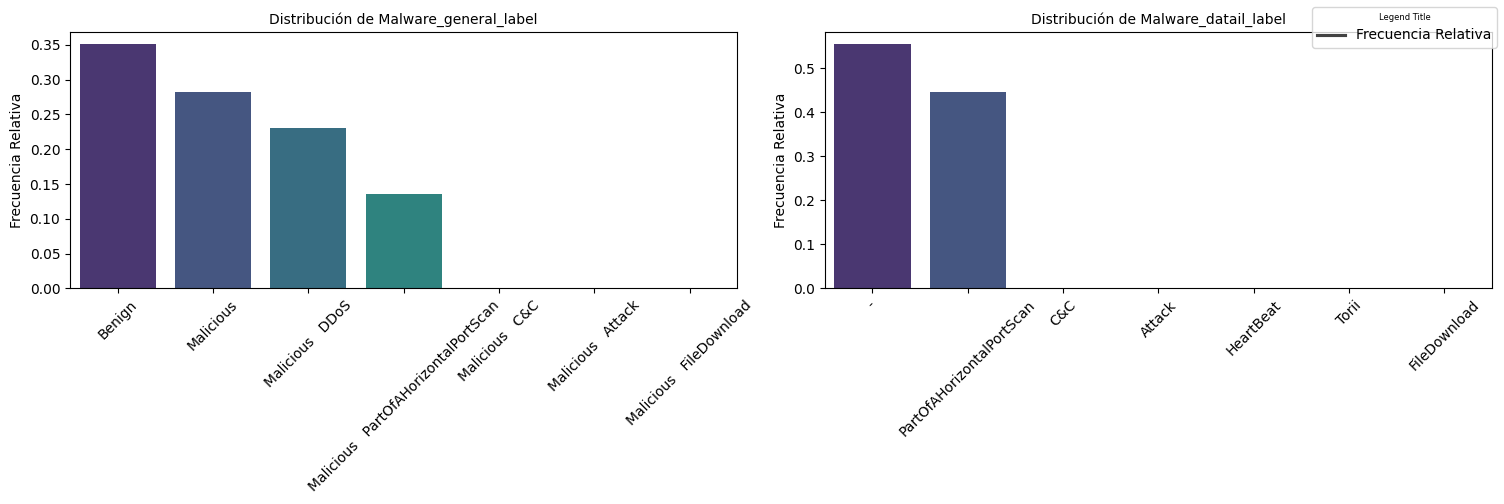

In [ ]:
pinta_distribucion_categoricas(df_malware_total, columnas_cat_mal, relativa=True, mostrar_valores=False);

Malware_genaral_label.- Será mi Target, aunqye la convertire en binaria, benign y maliciousus

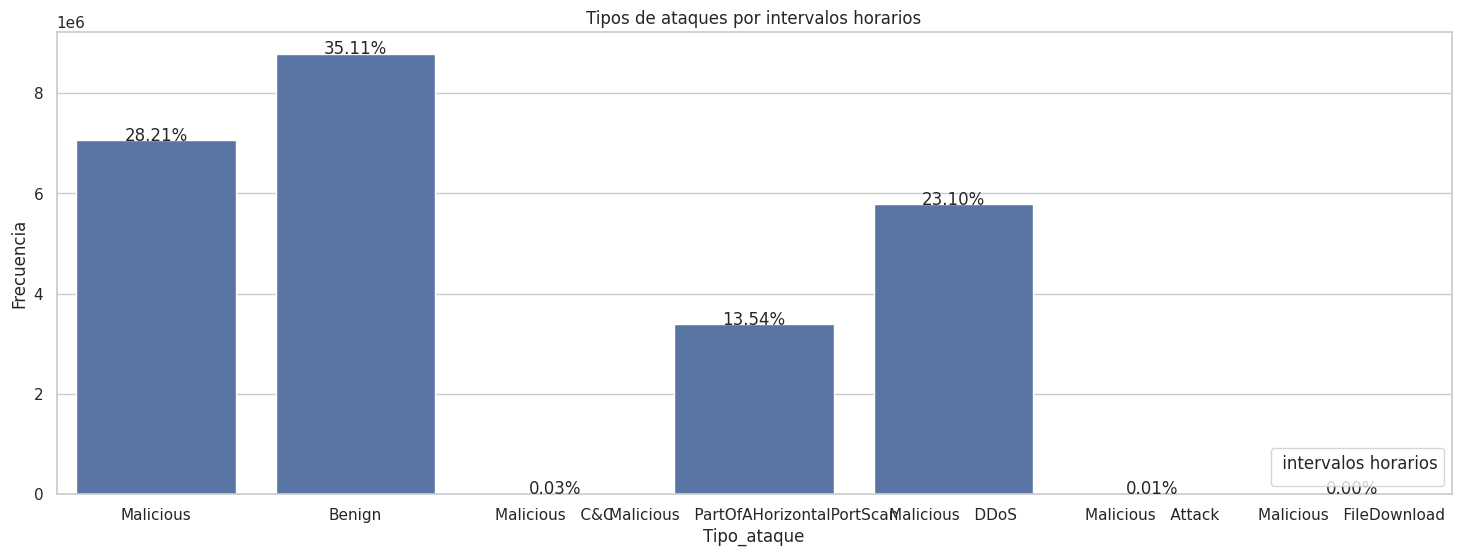

In [ ]:
# Configuración del gráfico
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")

# Crear el gráfico de barras
ax = sns.countplot(data=df_malware_total, x='Malware_general_label')

# Añadir porcentajes en la parte superior de cada barra
total = float(len(df_malware_total))  # Número total de registros

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.2%}'.format(height / total),
            ha="center")


# Ajustes adicionales
plt.xlabel('Tipo_ataque' )
plt.ylabel('Frecuencia')
plt.title('Tipos de ataques por intervalos horarios')
plt.legend(title=' intervalos horarios',loc= 'lower right')
plt.show()

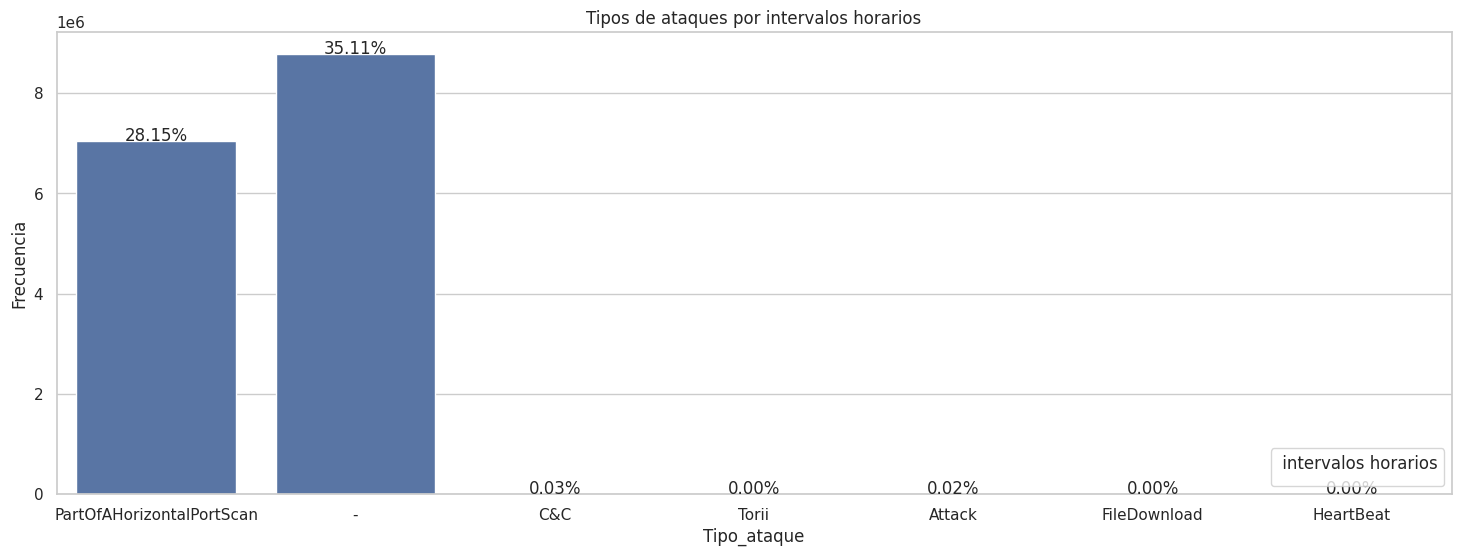

In [ ]:
# Configuración del gráfico
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")

# Crear el gráfico de barras
ax = sns.countplot(data=df_malware_total, x='Malware_datail_label')

# Añadir porcentajes en la parte superior de cada barra
total = float(len(df_malware_total))  # Número total de registros

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.2%}'.format(height / total),
            ha="center")


# Ajustes adicionales
plt.xlabel('Tipo_ataque' )
plt.ylabel('Frecuencia')
plt.title('Tipos de ataques por intervalos horarios')
plt.legend(title=' intervalos horarios',loc= 'lower right')
plt.show()

In [ ]:

# Combinar las columnas 'Malware_general_label' y 'Malware_detail_label' en una nueva columna 'Malware_general' en df_malware_total
df_malware_total['Malware_general'] = df_malware_total['Malware_general_label'].combine_first(df_malware_total['Malware_datail_label'])


In [ ]:
df_malware_total.head(1)

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,...,Send_orig_bytes,receive_orig_bytes,Status_connect,Info_history_connection,Malware_general_label,Malware_datail_label,Lost_orig_bytes,Lost_dest_bytes,Route_tunnels_used,Malware_general
0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,...,0,0,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-,Malicious


comparamos las tres columnas las 2 originales y la creada conjuntamente

<ipython-input-52-0d269b4751dc>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
<ipython-input-52-0d269b4751dc>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
<ipython-input-52-0d269b4751dc>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax1.get_xticklabels(), rotation=90)


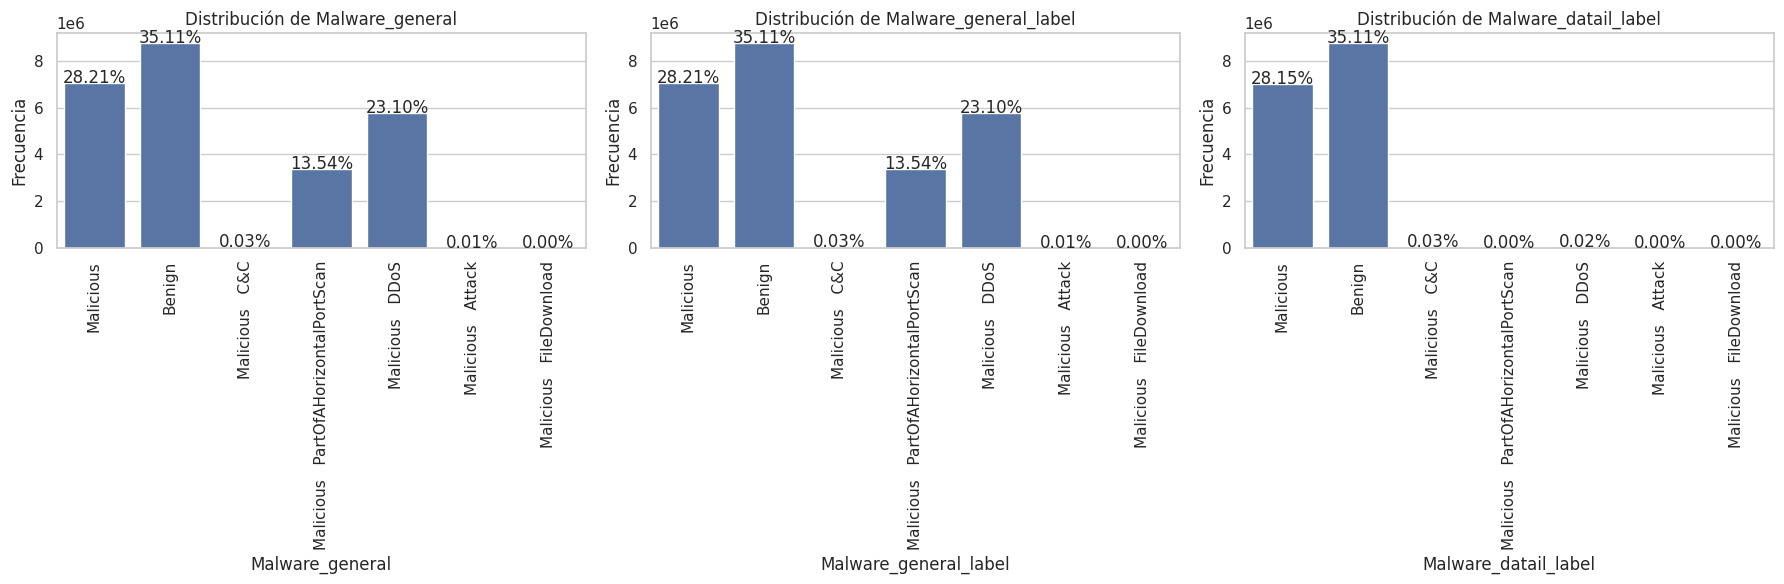

In [ ]:
# Configuración del gráfico
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")

# Crear el gráfico de barras para Malware_general_label
plt.subplot(1, 3, 1)
ax1 = sns.countplot(data=df_malware_total, x='Malware_general')
total1 = float(len(df_malware_total))  # Número total de registros
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.2%}'.format(height / total1),
            ha="center")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Malware_general')
plt.ylabel('Frecuencia')
plt.title('Distribución de Malware_general')

# Crear el gráfico de barras para Malware_detail_label
plt.subplot(1, 3, 2)
ax2 = sns.countplot(data=df_malware_total, x='Malware_general_label')
total2 = float(len(df_malware_total))  # Número total de registros
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.2%}'.format(height / total2),
            ha="center")
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Malware_general_label')
plt.ylabel('Frecuencia')
plt.title('Distribución de Malware_general_label')

# Crear el gráfico de barras para Malware_general
plt.subplot(1, 3, 3)
ax3 = sns.countplot(data=df_malware_total, x='Malware_datail_label')
total3 = float(len(df_malware_total))  # Número total de registros
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.2%}'.format(height / total3),
            ha="center")
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Malware_datail_label')
plt.ylabel('Frecuencia')
plt.title('Distribución de Malware_datail_label')

plt.tight_layout()
plt.show();


me cargo mal_ware general label y detail label , ya qye tengo la misma infiormacion ya en la creada

In [ ]:
df_malware_total.head(1)

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,...,Send_orig_bytes,receive_orig_bytes,Status_connect,Info_history_connection,Malware_general_label,Malware_datail_label,Lost_orig_bytes,Lost_dest_bytes,Route_tunnels_used,Malware_general
0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,...,0,0,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-,Malicious


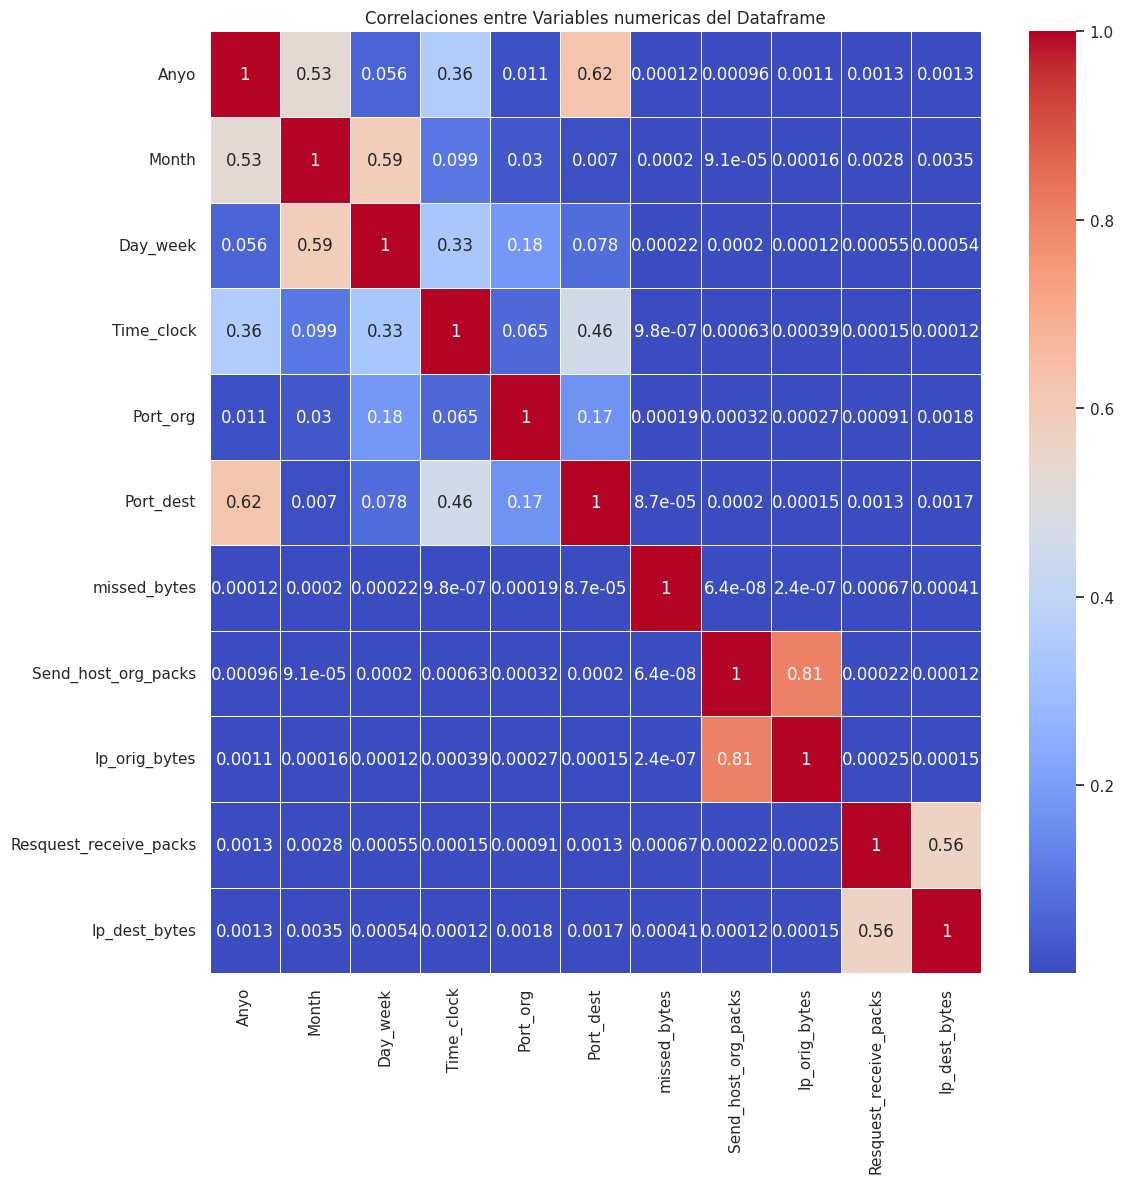

In [ ]:

# Correlaciones y Relaciones

# Seleccionar solo las columnas numéricas
columnas_numericas = df_malware_total.select_dtypes(include='number')
plt.figure(figsize= (12,12), edgecolor="b")
sns.heatmap(np.abs(columnas_numericas.corr()), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables numericas del Dataframe')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

hay coorelaciones repetidas entre varias variables  qye se analizara:<br>
'Ip_dest_bytes' , 'Resquest_receive_packs' <br>
'Port_dest' , "Time_clock" <br>
'Send_host_org_packs' ,'Ip_orig_bytes' <br>
'Day_week', 'Month'<br>

In [ ]:
x= "Ip_dest_bytes"
y= 'Resquest_receive_packs'
z= 'Port_dest'
a=  "Time_clock"
b= 'Send_host_org_packs'
c= 'Ip_orig_bytes'
d= 'Day_week'
e= 'Month'

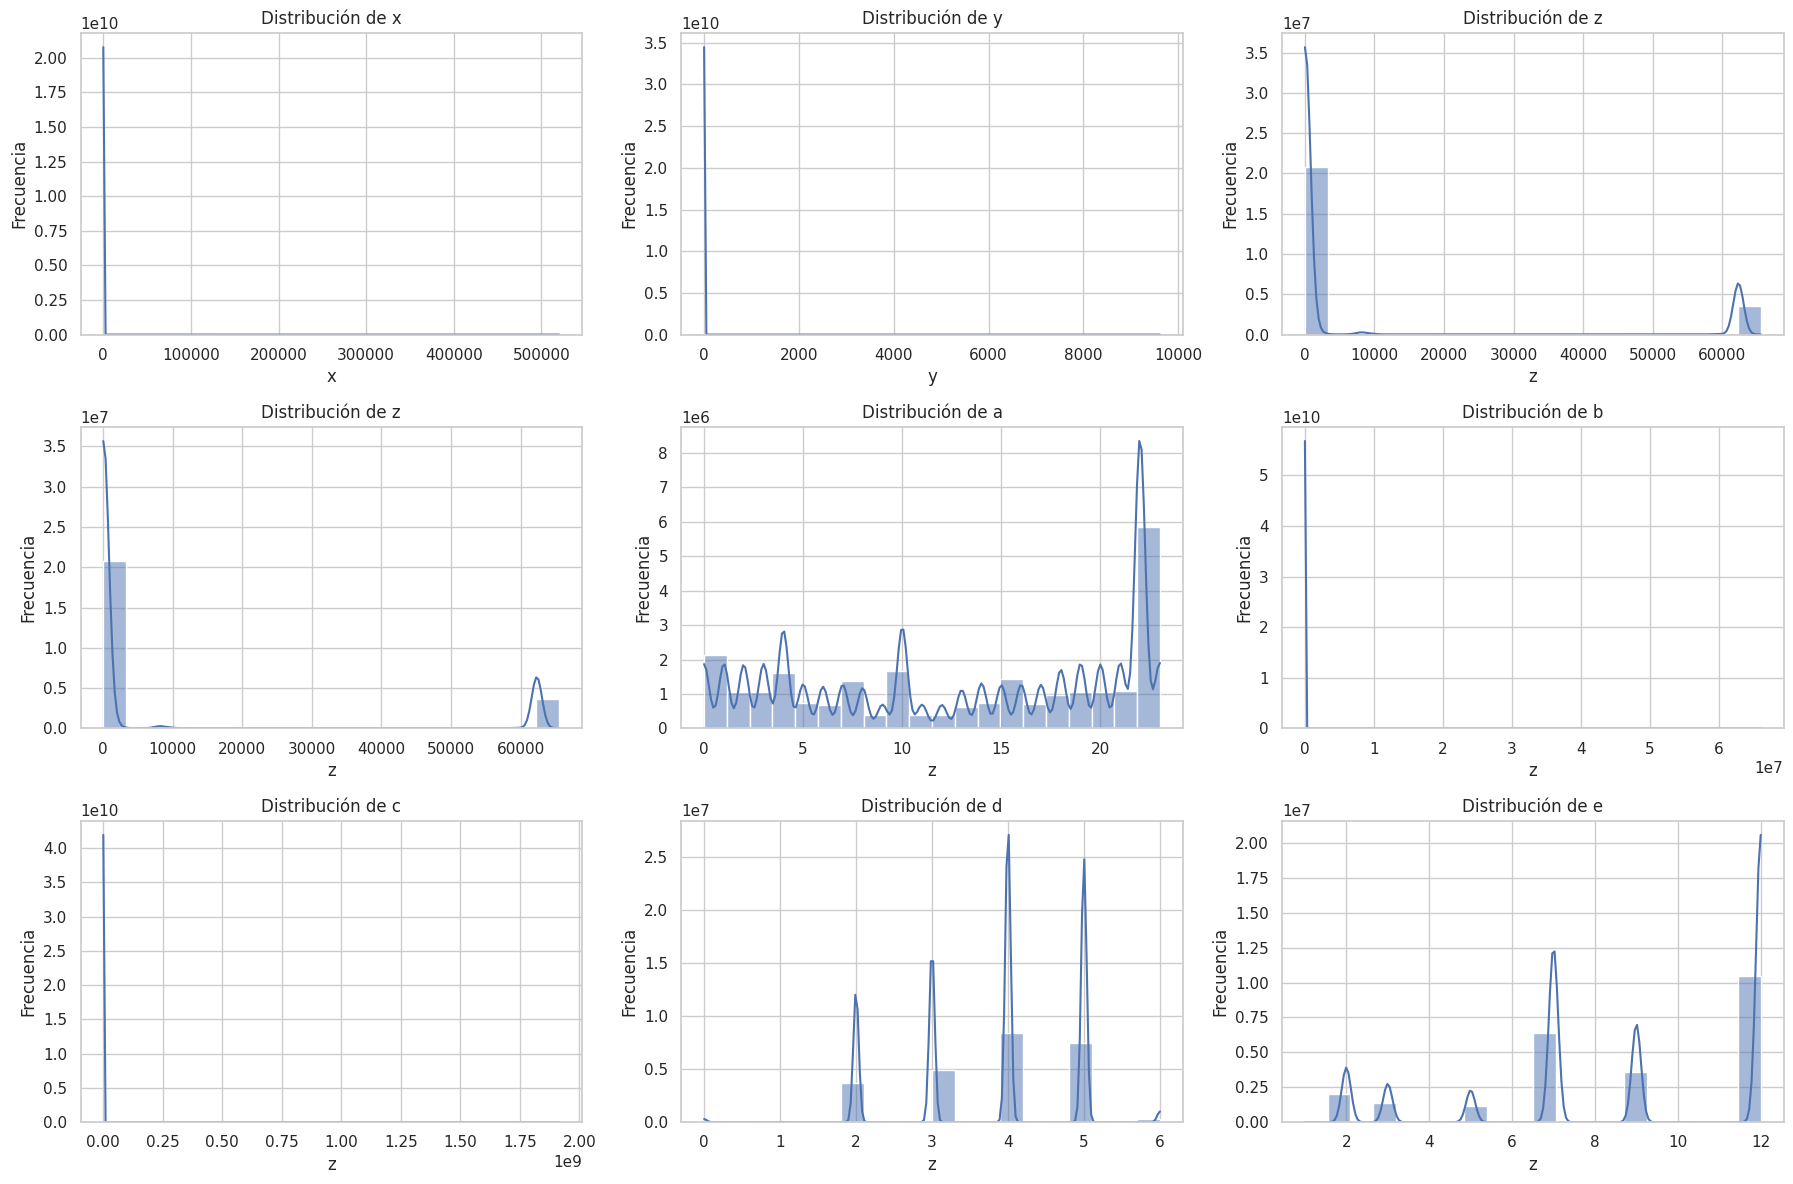

In [ ]:
# Configuración del gráfico
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

# Crear el histograma para la columna 'x'
plt.subplot(3, 3, 1)
sns.histplot(df_malware_total[x], bins=20, kde=True)
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.title('Distribución de x')

# Crear el histograma para la columna 'y'
plt.subplot(3, 3, 2)
sns.histplot(df_malware_total[y], bins=20, kde=True)
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.title('Distribución de y')

# Crear el histograma para la columna 'z'
plt.subplot(3,3, 3)
sns.histplot(df_malware_total[z], bins=20, kde=True)
plt.xlabel('z')
plt.ylabel('Frecuencia')
plt.title('Distribución de z')

# Crear el histograma para la columna 'z'
plt.subplot(3, 3, 4)
sns.histplot(df_malware_total[z], bins=20, kde=True)
plt.xlabel('z')
plt.ylabel('Frecuencia')
plt.title('Distribución de z')

# Crear el histograma para la columna 'z'
plt.subplot(3, 3, 5)
sns.histplot(df_malware_total[a], bins=20, kde=True)
plt.xlabel('z')
plt.ylabel('Frecuencia')
plt.title('Distribución de a')

# Crear el histograma para la columna 'z'
plt.subplot(3, 3, 6)
sns.histplot(df_malware_total[b], bins=20, kde=True)
plt.xlabel('z')
plt.ylabel('Frecuencia')
plt.title('Distribución de b')

# Crear el histograma para la columna 'z'
plt.subplot(3, 3, 7)
sns.histplot(df_malware_total[c], bins=20, kde=True)
plt.xlabel('z')
plt.ylabel('Frecuencia')
plt.title('Distribución de c')

# Crear el histograma para la columna 'z'
plt.subplot(3, 3, 8)
sns.histplot(df_malware_total[d], bins=20, kde=True)
plt.xlabel('z')
plt.ylabel('Frecuencia')
plt.title('Distribución de d')

# Crear el histograma para la columna 'z'
plt.subplot(3, 3, 9)
sns.histplot(df_malware_total[e], bins=20, kde=True)
plt.xlabel('z')
plt.ylabel('Frecuencia')
plt.title('Distribución de e')
plt.tight_layout()
plt.show()


x= "Ip_dest_bytes"
y= 'Resquest_receive_packs'
z= 'Port_dest'
a=  "Time_clock"
b= 'Send_host_org_packs'
c= 'Ip_orig_bytes'
d= 'Day_week'
e= 'Month'


In [ ]:
df_malware_total.Ip_dest_bytes.value_counts()/len(df_malware_total)*100 #me cargo esta

0.0       99.781580
76.0       0.051685
40.0       0.049230
80.0       0.013382
73.0       0.011287
            ...    
2103.0     0.000004
2009.0     0.000004
1756.0     0.000004
249.0      0.000004
5194.0     0.000004
Name: Ip_dest_bytes, Length: 1889, dtype: float64

In [ ]:
df_malware_total.Resquest_receive_packs.value_counts()/len(df_malware_total)*100

0.0      99.781580
1.0       0.121662
2.0       0.022662
6.0       0.010239
16.0      0.008480
           ...    
86.0      0.000004
88.0      0.000004
271.0     0.000004
279.0     0.000004
114.0     0.000004
Name: Resquest_receive_packs, Length: 129, dtype: float64

In [ ]:
df_malware_total.Send_host_org_packs.value_counts()/len(df_malware_total)*100

1.0          46.799447
3.0          19.447869
0.0          14.372574
2.0           8.861856
6.0           7.258269
               ...    
3980687.0     0.000004
2366276.0     0.000004
4216883.0     0.000004
159.0         0.000004
128.0         0.000004
Name: Send_host_org_packs, Length: 207, dtype: float64

In [ ]:
df_malware_total.Ip_orig_bytes.value_counts()/len(df_malware_total)*100 # me cargo esta

40.0      28.138344
60.0      18.468020
180.0     17.409138
0.0       14.372574
120.0      8.909619
            ...    
3693.0     0.000004
5141.0     0.000004
3793.0     0.000004
4629.0     0.000004
4078.0     0.000004
Name: Ip_orig_bytes, Length: 1858, dtype: float64

In [ ]:
df_malware_total.head()

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,...,Duration_conexion,Send_orig_bytes,receive_orig_bytes,Status_connect,Info_history_connection,Malware_general_label,Malware_datail_label,Lost_orig_bytes,Lost_dest_bytes,Route_tunnels_used
0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,...,2.999051,0,0,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-
1,2018,5,2,15,15-18,56305.0,23.0,0.0,1.0,60.0,...,-,-,-,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-
2,2018,5,2,15,15-18,41101.0,23.0,0.0,1.0,60.0,...,-,-,-,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-
3,2018,5,2,15,15-18,60905.0,23.0,0.0,3.0,180.0,...,2.998796,0,0,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-
4,2018,5,2,15,15-18,44301.0,23.0,0.0,1.0,60.0,...,-,-,-,S0,S,Malicious,PartOfAHorizontalPortScan,-,-,-


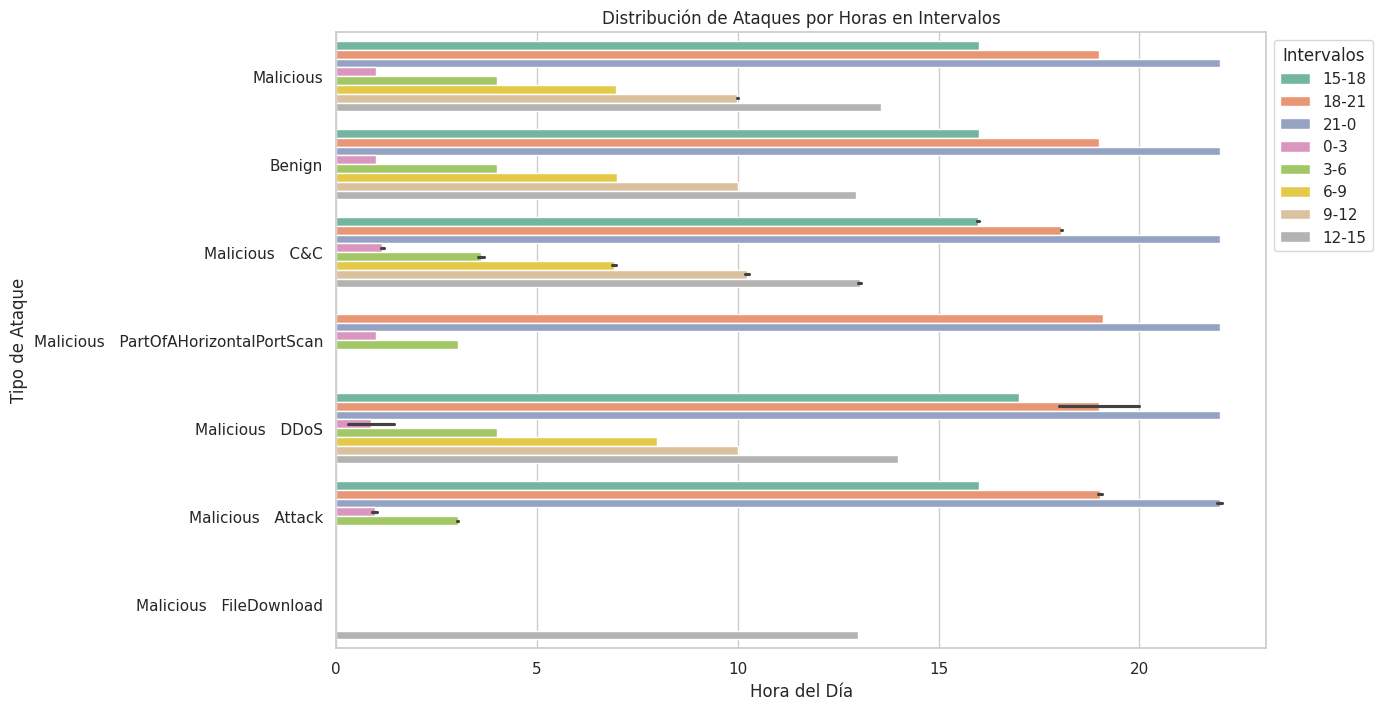

In [ ]:

#Crear un bar plot para la distribución de ataques por horas en intervalos
plt.figure(figsize=(12, 8))
sns.barplot(x='Time_clock', y='Malware_general', hue='Interval_time', data=df_malware_total, palette='Set2')
plt.title('Distribución de Ataques por Horas en Intervalos')
plt.xlabel('Hora del Día')
plt.ylabel('Tipo de Ataque')
plt.legend(title='Intervalos', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
df_malware_total.isna().sum()

Anyo                       0
Month                      0
Day_week                   0
Time_clock                 0
Interval_time              0
Port_org                   0
Port_dest                  0
missed_bytes               0
Ip_orig_bytes              0
Ip_dest_bytes              0
Id_session                 0
Ip_host_org                0
Ip_host_dest               0
Protocol_red               0
Service_protocol           0
Duration_conexion          0
Send_orig_bytes            0
receive_orig_bytes         0
Status_connect             0
Info_history_connection    0
Lost_orig_bytes            0
Lost_dest_bytes            0
Route_tunnels_used         0
Malware_general            0
dtype: int64

In [ ]:
df_malware_total.columns

Index(['Anyo', 'Month', 'Day_week', 'Time_clock', 'Interval_time', 'Port_org',
       'Port_dest', 'missed_bytes', 'Send_host_org_packs', 'Ip_orig_bytes',
       'Resquest_receive_packs', 'Ip_dest_bytes', 'Id_session', 'Ip_host_org',
       'Ip_host_dest', 'Protocol_red', 'Service_protocol', 'Duration_conexion',
       'Send_orig_bytes', 'receive_orig_bytes', 'Status_connect',
       'Info_history_connection', 'Malware_general_label',
       'Malware_datail_label', 'Lost_orig_bytes', 'Lost_dest_bytes',
       'Route_tunnels_used', 'Malware_general'],
      dtype='object')

In [ ]:
df_malware_total.drop(columns=['Resquest_receive_packs'], inplace=True)
df_malware_total.drop(columns=['Malware_datail_label'], inplace=True)
df_malware_total.drop(columns=['Malware_general_label'], inplace=True)
df_malware_total.drop(columns=['Send_host_org_packs'], inplace=True)

In [ ]:
df_malware_total.head()

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Ip_orig_bytes,Ip_dest_bytes,...,Service_protocol,Duration_conexion,Send_orig_bytes,receive_orig_bytes,Status_connect,Info_history_connection,Lost_orig_bytes,Lost_dest_bytes,Route_tunnels_used,Malware_general
0,2018,5,2,15,15-18,51524.0,23.0,0.0,180.0,0.0,...,-,2.999051,0,0,S0,S,-,-,-,Malicious
1,2018,5,2,15,15-18,56305.0,23.0,0.0,60.0,0.0,...,-,-,-,-,S0,S,-,-,-,Malicious
2,2018,5,2,15,15-18,41101.0,23.0,0.0,60.0,0.0,...,-,-,-,-,S0,S,-,-,-,Malicious
3,2018,5,2,15,15-18,60905.0,23.0,0.0,180.0,0.0,...,-,2.998796,0,0,S0,S,-,-,-,Malicious
4,2018,5,2,15,15-18,44301.0,23.0,0.0,60.0,0.0,...,-,-,-,-,S0,S,-,-,-,Malicious


In [ ]:
"""# Definir grupos de columnas
Identificacion_conexion_de_la_conexion= ["Ip_host_org","Port_org","Ip_host_dest","Port_dest"]
Cantidad_datos_enviados_Y_recibidos_de_la_conexion= ['Protocol_red', 'Service_protocol', 'Duration_conexion',
       'Send_orig_bytes', 'receive_orig_bytes', 'Status_connect',
       'Lost_orig_bytes', 'Lost_dest_bytes', 'missed_bytes',
       'Info_history_connection', 'Ip_orig_bytes','Ip_dest_bytes']
Identificación_Malware = ['Malware_general']

# Añadir filas de información general
df_malware_total.loc[-1] = ['Identificacion_conexxion_de_la_conexion'] + [''] * (df_malware_total.shape[1] - 1)
df_malware_total.loc[-2] = [''] * len(Identificacion_conexion_de_la_conexion) + ['Cantidad_datos_enviados_Y_recibidos_de_la_conexion'] + [''] * (df_malware_total.shape[1] - len(Identificacion_conexion_de_la_conexion) - 1)
df_malware_total.loc[-3] = [''] * (len(Identificacion_conexion_de_la_conexion) + len(Cantidad_datos_enviados_Y_recibidos_de_la_conexion)) + ['Identificación_Malware'] + [''] * (df_malware_total.shape[1] - len(Identificacion_conexion_de_la_conexion) - len(Cantidad_datos_enviados_Y_recibidos_de_la_conexion) - 1)

df_malware_total.index = df_malware_total.index + 3
df_malware_total.sort_index(inplace=True)

# Mostrar el DataFrame resultante
df_malware_total.head(10)"""

'# Definir grupos de columnas\nIdentificacion_conexion_de_la_conexion= ["Ip_host_org","Port_org","Ip_host_dest","Port_dest"]\nCantidad_datos_enviados_Y_recibidos_de_la_conexion= [\'Protocol_red\', \'Service_protocol\', \'Duration_conexion\',\n       \'Send_orig_bytes\', \'receive_orig_bytes\', \'Status_connect\',\n       \'Lost_orig_bytes\', \'Lost_dest_bytes\', \'missed_bytes\',\n       \'Info_history_connection\', \'Ip_orig_bytes\',\'Ip_dest_bytes\']\nIdentificación_Malware = [\'Malware_general\']\n\n# Añadir filas de información general\ndf_malware_total.loc[-1] = [\'Identificacion_conexxion_de_la_conexion\'] + [\'\'] * (df_malware_total.shape[1] - 1)\ndf_malware_total.loc[-2] = [\'\'] * len(Identificacion_conexion_de_la_conexion) + [\'Cantidad_datos_enviados_Y_recibidos_de_la_conexion\'] + [\'\'] * (df_malware_total.shape[1] - len(Identificacion_conexion_de_la_conexion) - 1)\ndf_malware_total.loc[-3] = [\'\'] * (len(Identificacion_conexion_de_la_conexion) + len(Cantidad_datos_envia

In [ ]:
df_malware_total

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Ip_orig_bytes,Ip_dest_bytes,...,Service_protocol,Duration_conexion,Send_orig_bytes,receive_orig_bytes,Status_connect,Info_history_connection,Lost_orig_bytes,Lost_dest_bytes,Route_tunnels_used,Malware_general
0,2018,5,2,15,15-18,51524.0,23.0,0.0,180.0,0.0,...,-,2.999051,0,0,S0,S,-,-,-,Malicious
1,2018,5,2,15,15-18,56305.0,23.0,0.0,60.0,0.0,...,-,-,-,-,S0,S,-,-,-,Malicious
2,2018,5,2,15,15-18,41101.0,23.0,0.0,60.0,0.0,...,-,-,-,-,S0,S,-,-,-,Malicious
3,2018,5,2,15,15-18,60905.0,23.0,0.0,180.0,0.0,...,-,2.998796,0,0,S0,S,-,-,-,Malicious
4,2018,5,2,15,15-18,44301.0,23.0,0.0,60.0,0.0,...,-,-,-,-,S0,S,-,-,-,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,2018,7,3,8,6-9,28057.0,23.0,0.0,40.0,0.0,...,-,-,-,-,S0,S,-,-,-,Malicious
25010999,2018,7,3,8,6-9,52876.0,23.0,0.0,360.0,44.0,...,-,209.874367,0,0,S1,ShA,-,-,-,Benign
25011000,2018,7,3,7,6-9,39234.0,23.0,0.0,220.0,44.0,...,-,165.760290,0,0,S1,ShA,-,-,-,Benign
25011001,2018,7,3,8,6-9,11.0,0.0,0.0,68.0,0.0,...,-,-,-,-,OTH,-,-,-,-,Benign


In [ ]:
missing_percentage = (df_malware_total.isna().sum() / df_malware_total.shape[0]) * 100
print(missing_percentage)

Anyo                       0.0
Month                      0.0
Day_week                   0.0
Time_clock                 0.0
Interval_time              0.0
Port_org                   0.0
Port_dest                  0.0
missed_bytes               0.0
Ip_orig_bytes              0.0
Ip_dest_bytes              0.0
Ip_host_org                0.0
Ip_host_dest               0.0
Protocol_red               0.0
Status_connect             0.0
Info_history_connection    0.0
Malware_general            0.0
dtype: float64


In [ ]:
dash_mask = df_malware_total.eq('-')
dash_count = dash_mask.sum()

In [ ]:
dash_count

Anyo                           0
Month                          0
Day_week                       0
Time_clock                     0
Interval_time                  0
Port_org                       0
Port_dest                      0
missed_bytes                   0
Ip_orig_bytes                  0
Ip_dest_bytes                  0
Ip_host_org                    0
Ip_host_dest                   0
Protocol_red                   0
Status_connect                 0
Info_history_connection    25116
Malware_general                0
dtype: int64

In [ ]:
dash_percentage = (dash_mask.sum() / df_malware_total.shape[0]) * 100


debido a la cantidad de guiones que tienen las columnasService protocoll, los_orig_bytes, lost_des_bytes y rote_tunnels_used, que estan en el 100%, es decir no exsite otra cossa que no sean guines me las cargo

In [ ]:
df_malware_total.drop(columns=['Service_protocol'], inplace=True)
df_malware_total.drop(columns=['Lost_orig_bytes'], inplace=True)
df_malware_total.drop(columns=['Lost_dest_bytes'], inplace=True)
df_malware_total.drop(columns=['Route_tunnels_used'], inplace=True)

In [ ]:
df_malware_total

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Ip_orig_bytes,Ip_dest_bytes,Ip_host_org,Ip_host_dest,Protocol_red,Status_connect,Info_history_connection,Malware_general
0,2018,5,2,15,15-18,51524.0,23.0,0.0,180.0,0.0,192.168.100.103,65.127.233.163,tcp,S0,S,Malicious
1,2018,5,2,15,15-18,56305.0,23.0,0.0,60.0,0.0,192.168.100.103,63.150.16.171,tcp,S0,S,Malicious
2,2018,5,2,15,15-18,41101.0,23.0,0.0,60.0,0.0,192.168.100.103,111.40.23.49,tcp,S0,S,Malicious
3,2018,5,2,15,15-18,60905.0,23.0,0.0,180.0,0.0,192.168.100.103,131.174.215.147,tcp,S0,S,Malicious
4,2018,5,2,15,15-18,44301.0,23.0,0.0,60.0,0.0,192.168.100.103,91.42.47.63,tcp,S0,S,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,2018,7,3,8,6-9,28057.0,23.0,0.0,40.0,0.0,192.168.100.111,173.94.58.125,tcp,S0,S,Malicious
25010999,2018,7,3,8,6-9,52876.0,23.0,0.0,360.0,44.0,192.168.100.111,69.196.96.231,tcp,S1,ShA,Benign
25011000,2018,7,3,7,6-9,39234.0,23.0,0.0,220.0,44.0,192.168.100.111,192.121.45.63,tcp,S1,ShA,Benign
25011001,2018,7,3,8,6-9,11.0,0.0,0.0,68.0,0.0,168.102.14.4,192.168.100.111,icmp,OTH,-,Benign


In [ ]:
df_malware_total.receive_orig_bytes.value_counts()

-         15272073
0          6329131
0          3373792
48           12927
45            2825
            ...   
91961            1
128348           1
128252           1
9069             1
630              1
Name: receive_orig_bytes, Length: 936, dtype: int64

0           False
1           False
2           False
3           False
4           False
            ...  
25010998    False
25010999    False
25011000    False
25011001    False
25011002    False
Name: receive_orig_bytes, Length: 25011003, dtype: bool

In [ ]:
df_malware_total.receive_orig_bytes.value_counts()

-         15272073
0          6329131
0          3373792
48           12927
45            2825
            ...   
91961            1
128348           1
128252           1
9069             1
630              1
Name: receive_orig_bytes, Length: 936, dtype: int64

In [ ]:
df_malware_total.Duration_conexion.value_counts()

-             15272073
2e-06          1176259
1e-06           277903
5e-06            95427
4e-06            43740
                ...   
95.047470            1
94.893082            1
94.277663            1
92.184590            1
165.760290           1
Name: Duration_conexion, Length: 1079662, dtype: int64

In [ ]:
df_malware_total.drop(columns=['Id_session'], inplace=True)

In [ ]:
#no tiene media ni moda, y le faltan bastantes datos mas del 60%

In [ ]:
df_malware_total.drop(columns=['Duration_conexion'], inplace=True)
df_malware_total.drop(columns=['Send_orig_bytes'], inplace=True)
df_malware_total.drop(columns=['receive_orig_bytes'], inplace=True)

In [ ]:
print(dash_percentage)

Anyo                       0.00000
Month                      0.00000
Day_week                   0.00000
Time_clock                 0.00000
Interval_time              0.00000
Port_org                   0.00000
Port_dest                  0.00000
missed_bytes               0.00000
Ip_orig_bytes              0.00000
Ip_dest_bytes              0.00000
Ip_host_org                0.00000
Ip_host_dest               0.00000
Protocol_red               0.00000
Status_connect             0.00000
Info_history_connection    0.10042
Malware_general            0.00000
dtype: float64


In [ ]:
obtener_estadisticas(df_malware_total)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
Anyo,0.0,int64,2018.28,No,0.45,0.2,2018.0,2018.0,2019.0,numerica discreta,0.0
Month,0.0,int64,8.66,No,3.37,11.36,7.0,9.0,12.0,numerica discreta,0.0
Day_week,0.0,int64,3.81,No,1.08,1.17,3.0,4.0,5.0,numerica discreta,0.0
Time_clock,0.0,int64,12.96,No,7.85,61.6,5.0,14.0,21.0,numerica continua,0.0
Interval_time,0.0,object,No,21-0,No,No,No,No,No,categorica ordinal,0.0
Port_org,0.26,float64,39909.62,No,16091.97,258951549.59,32980.0,42993.0,52360.0,numerica continua,0.0
Port_dest,0.26,float64,9710.51,No,22174.48,491707739.75,23.0,23.0,81.0,numerica continua,0.0
missed_bytes,0.0,float64,76.33,No,381679.91,145679555881.049988,0.0,0.0,0.0,numerica continua,0.0
Ip_orig_bytes,0.01,float64,590.02,No,687810.32,473083036333.98999,40.0,60.0,180.0,numerica continua,0.0
Ip_dest_bytes,0.01,float64,1.75,No,376.2,141523.04,0.0,0.0,0.0,numerica continua,0.0


a la columna info_history_connection , la cual tiene un 10% de - pero si tiene moda, le imputo la moda

In [ ]:
df_malware_total.Info_history_connection 	.eq('-').sum()

25116

In [ ]:
df_malware_total["Info_history_connection"] = df_malware_total["Info_history_connection"].apply(lambda x: x.replace("-", "S"))


In [ ]:
dash_mask = df_malware_total.eq('-')
dash_count = dash_mask.sum()

In [ ]:
dash_count

Anyo                       0
Month                      0
Day_week                   0
Time_clock                 0
Interval_time              0
Port_org                   0
Port_dest                  0
missed_bytes               0
Ip_orig_bytes              0
Ip_dest_bytes              0
Ip_host_org                0
Ip_host_dest               0
Protocol_red               0
Status_connect             0
Info_history_connection    0
Malware_general            0
dtype: int64

In [ ]:
df_malware_total

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Ip_orig_bytes,Ip_dest_bytes,Ip_host_org,Ip_host_dest,Protocol_red,Status_connect,Info_history_connection,Malware_general
0,2018,5,2,15,15-18,51524.0,23.0,0.0,180.0,0.0,192.168.100.103,65.127.233.163,tcp,S0,S,Malicious
1,2018,5,2,15,15-18,56305.0,23.0,0.0,60.0,0.0,192.168.100.103,63.150.16.171,tcp,S0,S,Malicious
2,2018,5,2,15,15-18,41101.0,23.0,0.0,60.0,0.0,192.168.100.103,111.40.23.49,tcp,S0,S,Malicious
3,2018,5,2,15,15-18,60905.0,23.0,0.0,180.0,0.0,192.168.100.103,131.174.215.147,tcp,S0,S,Malicious
4,2018,5,2,15,15-18,44301.0,23.0,0.0,60.0,0.0,192.168.100.103,91.42.47.63,tcp,S0,S,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,2018,7,3,8,6-9,28057.0,23.0,0.0,40.0,0.0,192.168.100.111,173.94.58.125,tcp,S0,S,Malicious
25010999,2018,7,3,8,6-9,52876.0,23.0,0.0,360.0,44.0,192.168.100.111,69.196.96.231,tcp,S1,ShA,Benign
25011000,2018,7,3,7,6-9,39234.0,23.0,0.0,220.0,44.0,192.168.100.111,192.121.45.63,tcp,S1,ShA,Benign
25011001,2018,7,3,8,6-9,11.0,0.0,0.0,68.0,0.0,168.102.14.4,192.168.100.111,icmp,OTH,S,Benign


In [ ]:
df_malware_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Anyo                     int64  
 1   Month                    int64  
 2   Day_week                 int64  
 3   Time_clock               int64  
 4   Interval_time            object 
 5   Port_org                 float64
 6   Port_dest                float64
 7   missed_bytes             float64
 8   Ip_orig_bytes            float64
 9   Ip_dest_bytes            float64
 10  Ip_host_org              object 
 11  Ip_host_dest             object 
 12  Protocol_red             object 
 13  Status_connect           object 
 14  Info_history_connection  object 
 15  Malware_general          object 
dtypes: float64(5), int64(4), object(7)
memory usage: 3.0+ GB


In [ ]:
df_malware_total.to_csv('/content/drive/MyDrive/df_malware_total_limpio.csv', index=False)

# 2 - MALWARE TOTAL LIMPIO

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/df_malware_total_limpio.csv')

In [ ]:
df

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,Resquest_receive_packs,Ip_dest_bytes,Ip_host_org,Ip_host_dest,Protocol_red,Status_connect,Info_history_connection,Malware_general_label,Malware_datail_label,Malware_general
0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,65.127.233.163,tcp,S0,S,Malicious,PartOfAHorizontalPortScan,Malicious
1,2018,5,2,15,15-18,56305.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,63.150.16.171,tcp,S0,S,Malicious,PartOfAHorizontalPortScan,Malicious
2,2018,5,2,15,15-18,41101.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,111.40.23.49,tcp,S0,S,Malicious,PartOfAHorizontalPortScan,Malicious
3,2018,5,2,15,15-18,60905.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,131.174.215.147,tcp,S0,S,Malicious,PartOfAHorizontalPortScan,Malicious
4,2018,5,2,15,15-18,44301.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,91.42.47.63,tcp,S0,S,Malicious,PartOfAHorizontalPortScan,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,2018,7,3,8,6-9,28057.0,23.0,0.0,1.0,40.0,0.0,0.0,192.168.100.111,173.94.58.125,tcp,S0,S,Malicious,PartOfAHorizontalPortScan,Malicious
25010999,2018,7,3,8,6-9,52876.0,23.0,0.0,8.0,360.0,1.0,44.0,192.168.100.111,69.196.96.231,tcp,S1,ShA,Benign,-,Benign
25011000,2018,7,3,7,6-9,39234.0,23.0,0.0,5.0,220.0,1.0,44.0,192.168.100.111,192.121.45.63,tcp,S1,ShA,Benign,-,Benign
25011001,2018,7,3,8,6-9,11.0,0.0,0.0,1.0,68.0,0.0,0.0,168.102.14.4,192.168.100.111,icmp,OTH,S,Benign,-,Benign


In [ ]:
df.drop(columns=['Malware_datail_label'], inplace=True)
df.drop(columns=['Malware_general_label'], inplace=True)

In [ ]:
df

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,Resquest_receive_packs,Ip_dest_bytes,Ip_host_org,Ip_host_dest,Protocol_red,Status_connect,Info_history_connection,Malware_general
0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,65.127.233.163,tcp,S0,S,Malicious
1,2018,5,2,15,15-18,56305.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,63.150.16.171,tcp,S0,S,Malicious
2,2018,5,2,15,15-18,41101.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,111.40.23.49,tcp,S0,S,Malicious
3,2018,5,2,15,15-18,60905.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,131.174.215.147,tcp,S0,S,Malicious
4,2018,5,2,15,15-18,44301.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,91.42.47.63,tcp,S0,S,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,2018,7,3,8,6-9,28057.0,23.0,0.0,1.0,40.0,0.0,0.0,192.168.100.111,173.94.58.125,tcp,S0,S,Malicious
25010999,2018,7,3,8,6-9,52876.0,23.0,0.0,8.0,360.0,1.0,44.0,192.168.100.111,69.196.96.231,tcp,S1,ShA,Benign
25011000,2018,7,3,7,6-9,39234.0,23.0,0.0,5.0,220.0,1.0,44.0,192.168.100.111,192.121.45.63,tcp,S1,ShA,Benign
25011001,2018,7,3,8,6-9,11.0,0.0,0.0,1.0,68.0,0.0,0.0,168.102.14.4,192.168.100.111,icmp,OTH,S,Benign


array([[<Axes: title={'center': 'Anyo'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day_week'}>],
       [<Axes: title={'center': 'Time_clock'}>,
        <Axes: title={'center': 'Port_org'}>,
        <Axes: title={'center': 'Port_dest'}>],
       [<Axes: title={'center': 'missed_bytes'}>,
        <Axes: title={'center': 'Send_host_org_packs'}>,
        <Axes: title={'center': 'Ip_orig_bytes'}>],
       [<Axes: title={'center': 'Resquest_receive_packs'}>,
        <Axes: title={'center': 'Ip_dest_bytes'}>, <Axes: >]],
      dtype=object)

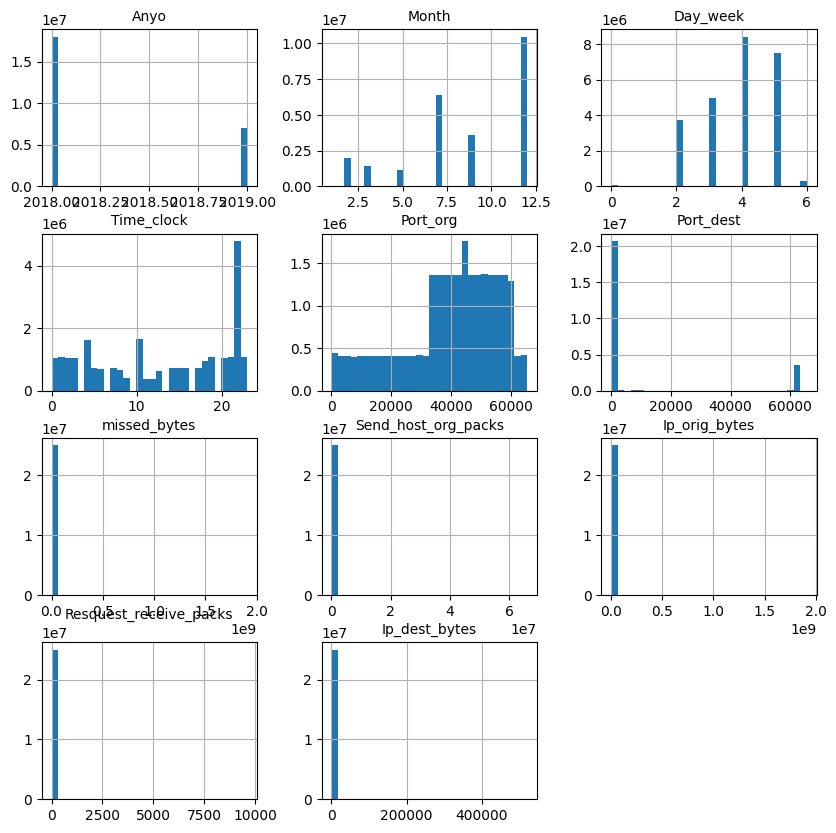

In [ ]:
df.hist(figsize=(10,10), bins=30)

In [ ]:
df.Protocol_red.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [ ]:
df.Malware_general.unique()

array(['Malicious', 'Benign', 'Malicious   C&C',
       'Malicious   PartOfAHorizontalPortScan', 'Malicious   DDoS',
       'Malicious   Attack', 'Malicious   FileDownload'], dtype=object)

In [ ]:
columnas_categoricas=["Protocol_red","Status_connect", "Info_history_connection" ,"Malware_general"]

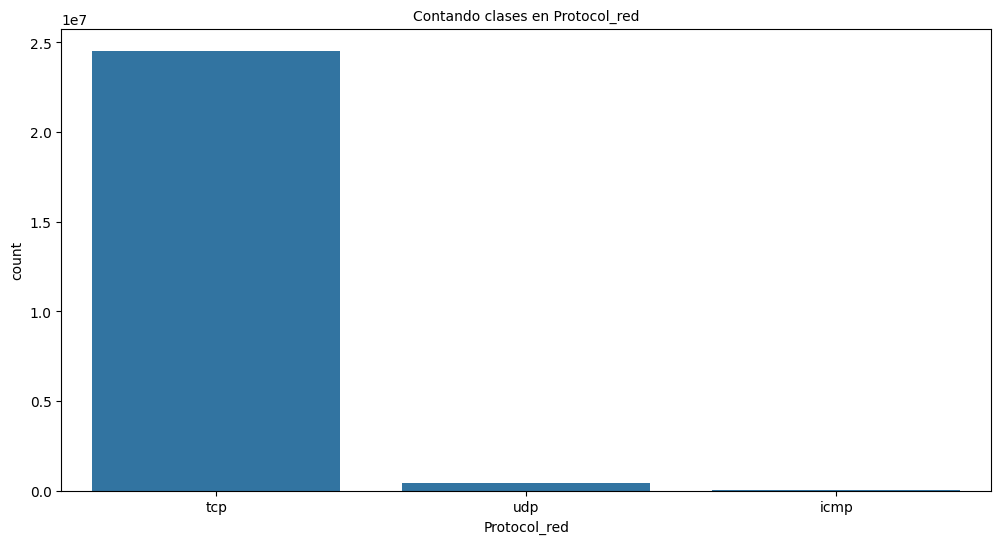

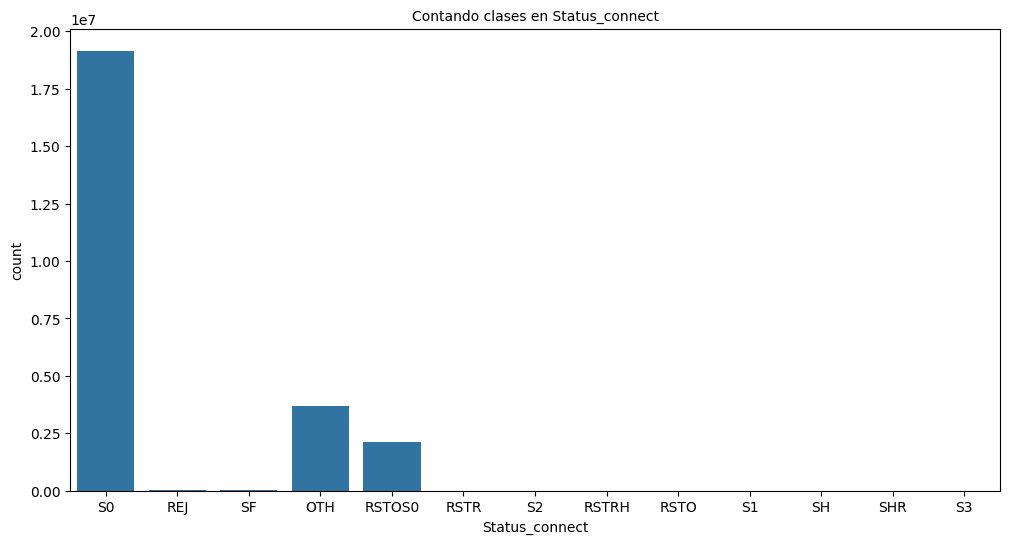

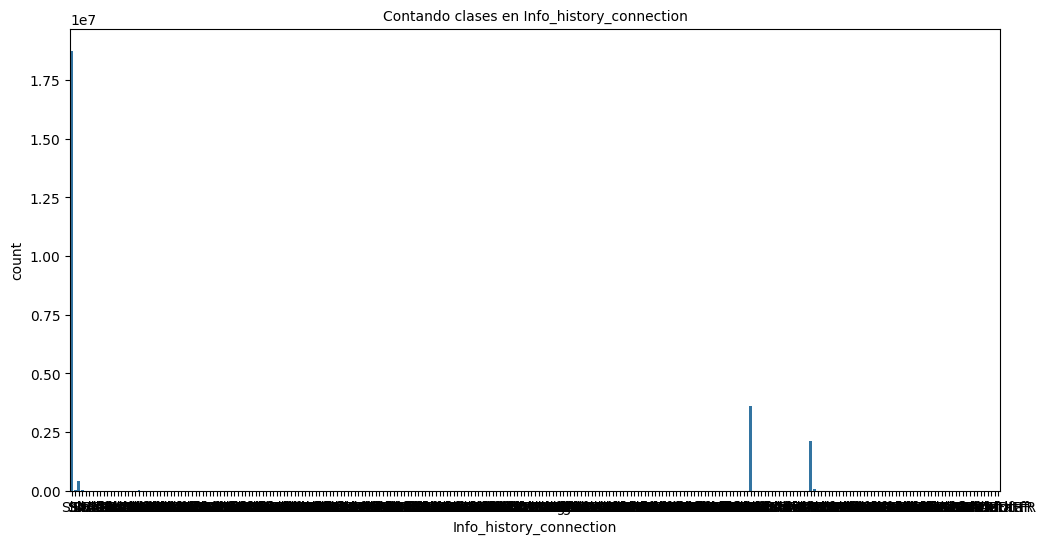

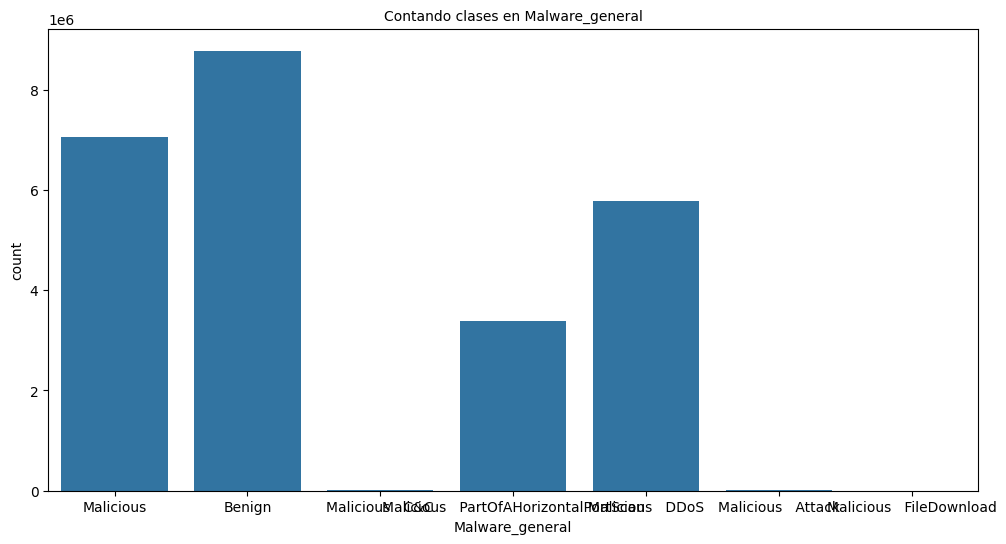

In [ ]:
# Iterar sobre cada columna y crear un subgráfico de barras usando seaborn
for col in columnas_categoricas:
    plt.figure(figsize=(12,6))
    sns.countplot(x=df[col])
    plt.title(f'Contando clases en {col}')
    plt.show()


In [ ]:
df.head(1)

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,Resquest_receive_packs,Ip_dest_bytes,Ip_host_org,Ip_host_dest,Protocol_red,Status_connect,Info_history_connection,Malware_general
0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,65.127.233.163,tcp,S0,S,Malicious


In [ ]:
counts = df['Malware_general_bin'].value_counts()
for value, count in counts.items():
    print(f"Número de veces que aparece '{value}': {count}") # los numeros corresponden, se aunado todo el Maliicius en 1


Número de veces que aparece 'Malicious': 16230845
Número de veces que aparece 'Benign': 8780158


In [ ]:
#hacer la columna Malware_general binaria y target
benigno="Benign"
malicioso="Malicious"
list_palabra=['Malicious   C&C',
       'Malicious   PartOfAHorizontalPortScan', 'Malicious   DDoS',
       'Malicious   Attack', 'Malicious   FileDownload']
def asignar_valores(columna):
    columna_new = columna.copy()
    for index, valor in columna_new.items():
        if valor.startswith('Malicious'):
            columna_new[index] = malicioso
    return columna_new


# Llamada a la función para asignar valores binarios a la columna 'Malware_general'
df['Malware_general_bin'] = asignar_valores(df['Malware_general'])




In [ ]:
df.head(1)

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,Resquest_receive_packs,Ip_dest_bytes,Ip_host_org,Ip_host_dest,Protocol_red,Status_connect,Info_history_connection,Malware_general,Malware_general_bin
0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,65.127.233.163,tcp,S0,S,Malicious,Malicious


In [ ]:
df.drop(columns={"Malware_general"}, inplace = True)

In [ ]:
counts = df['Protocol_red_map'].value_counts()
for value, count in counts.items():
    print(f"Número de veces que aparece '{value}': {count}")

Número de veces que aparece '1': 24543393
Número de veces que aparece '2': 442494
Número de veces que aparece '3': 25116


In [ ]:
col= "Protocol_red"
df['Protocol_red_map'] = df['Protocol_red'].apply(lambda x: 1 if x == "tcp" else (2 if x == "udp" else 3))


In [ ]:
df.head(1)

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,Resquest_receive_packs,Ip_dest_bytes,Ip_host_org,Ip_host_dest,Protocol_red,Status_connect,Info_history_connection,Malware_general_bin,Protocol_red_map
0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,65.127.233.163,tcp,S0,S,Malicious,1


In [ ]:
df.drop(columns={"Protocol_red"}, inplace = True)

In [ ]:
counts = df["Info_history_connection"].value_counts()
for value, count in counts.items():
    print(f"Número de veces que aparece '{value}': {count}") #intentar clusterizarla a ver si podemos agrupar los datos en grupos y conseguir 2 o 3 asi reducir numero de caracteristicas

KeyError: 'Info_history_connection'

In [ ]:
#CLUSTERIZAMOS USANDO KMEANS
col= "Info_history_connection"


col_cluster = df[col].copy()
label_encoder = LabelEncoder()
col_cluster_encoded = label_encoder.fit_transform(col_cluster)


KeyError: 'Info_history_connection'

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(col_cluster_encoded.reshape(-1, 1))
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Varianza Intra-cluster')
plt.title('Método del Codo')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

KeyboardInterrupt: 

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(col_cluster_encoded.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
df["History_connect_cluster"] = kmeans.labels_


NameError: name 'kmeans' is not defined

In [ ]:
counts = df["History_connect_cluster"].value_counts()
for value, count in counts.items():
    print(f"Número de veces que aparece '{value}': {count}")

Número de veces que aparece '1': 20876936
Número de veces que aparece '0': 4100830
Número de veces que aparece '2': 33237


In [ ]:
df.drop(columns={'Info_history_connection'}, inplace = True)

In [ ]:
df.head(1)

,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,Resquest_receive_packs,Ip_dest_bytes,Ip_host_org,Ip_host_dest,Status_connect,Malware_general_bin,Protocol_red_map,History_connect_cluster
0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,65.127.233.163,S0,Malicious,1,1


In [ ]:
df.to_csv(r"/content/drive/MyDrive/malware_total_limpio2.csv", index=True)

# 3 PARTE MALWARE TOTAL AUN MAS LIMPIO


In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/malware_total_limpio2.csv")

In [ ]:
df

,Unnamed: 0,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,Resquest_receive_packs,Ip_dest_bytes,Ip_host_org,Ip_host_dest,Status_connect,Malware_general_bin,Protocol_red_map,History_connect_cluster
0,0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,65.127.233.163,S0,Malicious,1,1
1,1,2018,5,2,15,15-18,56305.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,63.150.16.171,S0,Malicious,1,1
2,2,2018,5,2,15,15-18,41101.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,111.40.23.49,S0,Malicious,1,1
3,3,2018,5,2,15,15-18,60905.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,131.174.215.147,S0,Malicious,1,1
4,4,2018,5,2,15,15-18,44301.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,91.42.47.63,S0,Malicious,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,25010998,2018,7,3,8,6-9,28057.0,23.0,0.0,1.0,40.0,0.0,0.0,192.168.100.111,173.94.58.125,S0,Malicious,1,1
25010999,25010999,2018,7,3,8,6-9,52876.0,23.0,0.0,8.0,360.0,1.0,44.0,192.168.100.111,69.196.96.231,S1,Benign,1,1
25011000,25011000,2018,7,3,7,6-9,39234.0,23.0,0.0,5.0,220.0,1.0,44.0,192.168.100.111,192.121.45.63,S1,Benign,1,1
25011001,25011001,2018,7,3,8,6-9,11.0,0.0,0.0,1.0,68.0,0.0,0.0,168.102.14.4,192.168.100.111,OTH,Benign,3,1


In [ ]:
counts = df['Status_connect'].value_counts()
for value, count in counts.items():
    print(f"Número de veces que aparece '{value}': {count}")

Número de veces que aparece 'S0': 19151121
Número de veces que aparece 'OTH': 3685336
Número de veces que aparece 'RSTOS0': 2119852
Número de veces que aparece 'SF': 33267
Número de veces que aparece 'REJ': 16072
Número de veces que aparece 'S3': 2458
Número de veces que aparece 'RSTR': 1917
Número de veces que aparece 'RSTO': 514
Número de veces que aparece 'S2': 136
Número de veces que aparece 'S1': 131
Número de veces que aparece 'SH': 120
Número de veces que aparece 'RSTRH': 78
Número de veces que aparece 'SHR': 1


In [ ]:
#esta columna no se puede clusterizzar asi que le psare el label encoder
col=df["Status_connect"]
label=LabelEncoder()
Status_connect_label= label.fit_transform(col)


In [ ]:
Status_connect_label

array([6, 6, 6, ..., 7, 0, 0])

In [ ]:
df["Status_connect_label"] = Status_connect_label

In [ ]:
df.head()

,Unnamed: 0,Anyo,Month,Day_week,Time_clock,Interval_time,Port_org,Port_dest,missed_bytes,Send_host_org_packs,Ip_orig_bytes,Resquest_receive_packs,Ip_dest_bytes,Ip_host_org,Ip_host_dest,Status_connect,Malware_general_bin,Protocol_red_map,History_connect_cluster,Status_connect_label
0,0,2018,5,2,15,15-18,51524.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,65.127.233.163,S0,Malicious,1,1,6
1,1,2018,5,2,15,15-18,56305.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,63.150.16.171,S0,Malicious,1,1,6
2,2,2018,5,2,15,15-18,41101.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,111.40.23.49,S0,Malicious,1,1,6
3,3,2018,5,2,15,15-18,60905.0,23.0,0.0,3.0,180.0,0.0,0.0,192.168.100.103,131.174.215.147,S0,Malicious,1,1,6
4,4,2018,5,2,15,15-18,44301.0,23.0,0.0,1.0,60.0,0.0,0.0,192.168.100.103,91.42.47.63,S0,Malicious,1,1,6


In [ ]:
df.drop(columns={"Unnamed: 0", "Status_connect"}, inplace=True)

In [ ]:
counts = df["Status_connect_label"].value_counts()
for value, count in counts.items():
    print(f"Número de veces que aparece '{value}': {count}")

Número de veces que aparece '6': 19151121
Número de veces que aparece '0': 3685336
Número de veces que aparece '3': 2119852
Número de veces que aparece '10': 33267
Número de veces que aparece '1': 16072
Número de veces que aparece '9': 2458
Número de veces que aparece '4': 1917
Número de veces que aparece '2': 514
Número de veces que aparece '8': 136
Número de veces que aparece '7': 131
Número de veces que aparece '11': 120
Número de veces que aparece '5': 78
Número de veces que aparece '12': 1


In [ ]:
df.Status_connect_label.unique()

array([ 6,  1, 10,  0,  3,  4,  8,  5,  2,  7, 11, 12,  9])

In [ ]:
df.Port_org.unique()

array([51524., 56305., 41101., ..., 31868., 19654., 14427.])

In [ ]:
df.Ip_orig_bytes.unique()

array([  180.,    60.,   120., ..., 12810.,   485.,  4078.])

In [ ]:
df.Port_dest.unique()

array([2.3000e+01, 4.9560e+04, 2.1288e+04, ..., 1.7503e+04, 4.2991e+04,
       3.5113e+04])

In [ ]:
df.Send_host_org_packs.unique()

array([3.0000000e+00, 1.0000000e+00, 2.0000000e+00, 7.0000000e+00,
       1.2000000e+01, 4.0000000e+00, 8.0000000e+00, 9.0000000e+00,
       1.0000000e+01, 0.0000000e+00, 1.1000000e+01, 5.0000000e+00,
       6.0000000e+00, 1.3000000e+01, 2.0000000e+01, 2.1000000e+01,
       2.2000000e+01, 2.3000000e+01, 2.5000000e+01, 2.7000000e+01,
       2.6000000e+01, 2.8000000e+01, 2.9000000e+01, 1.6000000e+01,
       1.5000000e+01, 1.7000000e+01, 1.8000000e+01, 2.4000000e+01,
       4.1000000e+01, 4.2000000e+01, 3.1000000e+01, 3.0000000e+01,
       4.0000000e+01, 3.4000000e+01, 3.9000000e+01, 3.2000000e+01,
       3.7000000e+01, 3.3000000e+01, 4.4000000e+01, 4.6000000e+01,
       4.3000000e+01, 1.4000000e+01, 1.9000000e+01, 3.5000000e+01,
       3.8000000e+01, 3.6000000e+01, 4.7000000e+01, 4.5000000e+01,
       5.0000000e+01, 5.1000000e+01, 4.9000000e+01, 4.8000000e+01,
       5.2000000e+01, 6.0000000e+01, 8.2950000e+03, 8.8720000e+03,
       6.7930000e+03, 6.8000000e+01, 5.8950000e+03, 4.4850000e

In [ ]:
df.Resquest_receive_packs.unique()

array([0.000e+00, 1.000e+00, 1.200e+01, 3.000e+00, 4.000e+00, 2.000e+00,
       1.100e+01, 1.300e+01, 5.000e+00, 1.700e+01, 1.800e+01, 1.900e+01,
       2.000e+01, 1.600e+01, 2.500e+01, 2.400e+01, 2.700e+01, 2.600e+01,
       2.300e+01, 2.200e+01, 2.800e+01, 3.600e+01, 3.300e+01, 3.700e+01,
       3.400e+01, 3.500e+01, 3.100e+01, 3.200e+01, 3.800e+01, 3.900e+01,
       4.200e+01, 4.300e+01, 6.000e+00, 5.700e+01, 5.600e+01, 5.400e+01,
       4.400e+01, 4.000e+01, 4.500e+01, 5.800e+01, 6.100e+01, 5.500e+01,
       5.900e+01, 1.400e+01, 1.500e+01, 9.000e+00, 3.000e+01, 2.100e+01,
       7.000e+00, 8.000e+00, 4.100e+01, 5.200e+01, 6.000e+01, 5.300e+01,
       7.500e+01, 6.300e+01, 6.400e+01, 6.200e+01, 6.600e+01, 7.300e+01,
       6.900e+01, 4.900e+01, 6.500e+01, 7.200e+01, 2.900e+01, 4.700e+01,
       5.100e+01, 1.000e+01, 4.600e+01, 8.699e+03, 9.307e+03, 7.129e+03,
       6.147e+03, 4.702e+03, 3.890e+02, 1.710e+02, 7.400e+01, 1.454e+03,
       5.975e+03, 9.600e+01, 9.200e+01, 1.170e+02, 

In [ ]:
df.Ip_dest_bytes.unique()

array([   0.,   40.,   76., ..., 2766., 1212., 5194.])

In [ ]:
df.missed_bytes.unique()

array([0.00000000e+00, 1.57900000e+03, 1.58200000e+03, 4.50000000e+03,
       2.47200000e+03, 5.39000000e+03, 2.89600000e+03, 5.79200000e+03,
       4.34400000e+03, 1.44800000e+03, 1.90881948e+09, 4.38000000e+03,
       1.46000000e+03, 2.92000000e+03, 1.15840000e+04, 2.02720000e+04,
       1.30320000e+04, 8.68800000e+03, 1.73760000e+04, 1.01360000e+04,
       8.08800000e+03, 1.44000000e+03, 8.16000000e+03])

In [ ]:
col_cluster=["Port_org", "Port_dest", "missed_bytes", "Send_host_org_packs", "Ip_orig_bytes","Resquest_receive_packs","Ip_dest_bytes"]

In [ ]:
#CLUSTERIZAMOS col_cluster
for col in col_cluster:
  data=df[col].values.reshape(1,-1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

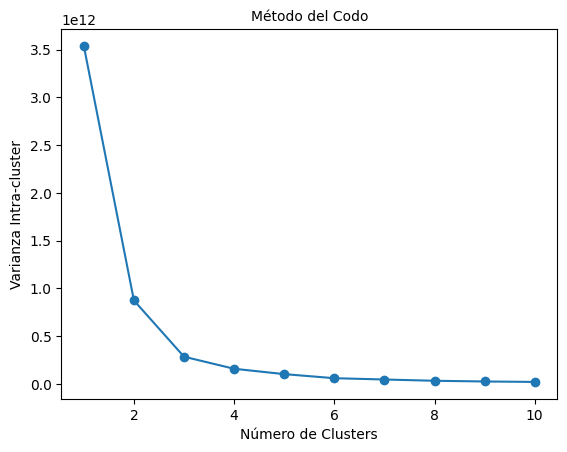

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data.reshape(-1, 1))
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Varianza Intra-cluster')
plt.title('Método del Codo')
plt.show()

In [ ]:
# Número de clusters que deseas crear
num_clusters = 2

# Iterar sobre cada columna de la lista col_cluster
for col in col_cluster:
    # Extraer la columnas y convertir en una matriz 2D
    data = df[col].values.reshape(-1, 1)

    # usar KMeans y ajustarlo a los datos de df[col]
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data)

    # Agregar las etiquetas de las columnas clusterizadas al DataFrame original
    df[f'{col}_cluster'] = kmeans.labels_





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
df.drop(columns={"Port_org", "Port_dest", "missed_bytes", "Send_host_org_packs", "Ip_orig_bytes","Resquest_receive_packs","Ip_dest_bytes"}, inplace=True)

In [ ]:
df

,Anyo,Month,Day_week,Time_clock,Interval_time,Malware_general_bin,Protocol_red_map,History_connect_cluster,Status_connect_label,Port_org_cluster,Port_dest_cluster,missed_bytes_cluster,Send_host_org_packs_cluster,Ip_orig_bytes_cluster,Resquest_receive_packs_cluster,Ip_dest_bytes_cluster,Ip_host_org_hash,Ip_host_dest_hash,Ip_host_org_hash_scal,Ip_host_dest_hash_scal
0,2018,5,2,15,15-18,Malicious,1,1,6,1,0,0,0,0,0,0,2641309998682193313,-7955547535499681982,-0.222429,-1.602694
1,2018,5,2,15,15-18,Malicious,1,1,6,1,0,0,0,0,0,0,2641309998682193313,230082587698153014,-0.222429,0.061263
2,2018,5,2,15,15-18,Malicious,1,1,6,1,0,0,0,0,0,0,2641309998682193313,3913288163162715537,-0.222429,0.809977
3,2018,5,2,15,15-18,Malicious,1,1,6,1,0,0,0,0,0,0,2641309998682193313,-2446326218880334885,-0.222429,-0.482791
4,2018,5,2,15,15-18,Malicious,1,1,6,1,0,0,0,0,0,0,2641309998682193313,-7157115013461210463,-0.222429,-1.440390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,2018,7,3,8,6-9,Malicious,1,1,6,0,0,0,0,0,0,0,1509641182431871592,3791492551671739782,-0.639007,0.785219
25010999,2018,7,3,8,6-9,Benign,1,1,7,1,0,0,0,0,0,0,1509641182431871592,-5646995559039817179,-0.639007,-1.133416
25011000,2018,7,3,7,6-9,Benign,1,1,7,1,0,0,0,0,0,0,1509641182431871592,990304496859760131,-0.639007,0.215800
25011001,2018,7,3,8,6-9,Benign,3,1,0,0,0,0,0,0,0,0,-6400493009144065938,1509641182431871592,-3.550804,0.321369


In [ ]:
df.to_csv(r"/content/drive/MyDrive/malware_total_limpio3.csv", index=True)

KeyboardInterrupt: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 18 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   Anyo                            int64 
 1   Month                           int64 
 2   Day_week                        int64 
 3   Time_clock                      int64 
 4   Interval_time                   object
 5   Ip_host_org                     object
 6   Ip_host_dest                    object
 7   Malware_general_bin             object
 8   Protocol_red_map                int64 
 9   History_connect_cluster         int64 
 10  Status_connect_label            int64 
 11  Port_org_cluster                int32 
 12  Port_dest_cluster               int32 
 13  missed_bytes_cluster            int32 
 14  Send_host_org_packs_cluster     int32 
 15  Ip_orig_bytes_cluster           int32 
 16  Resquest_receive_packs_cluster  int32 
 17  Ip_dest_bytes_cluster           int32 
dtype

In [ ]:
ips_hash=["Ip_host_org", "Ip_host_dest"]

In [ ]:
#voy a hashear las columnas ips
def ip_hash(ip):
  return hash(ip)

for col in df[ips_hash]:
  df[f"{col}_hash"]=df[f"{col}"].apply(ip_hash)



In [ ]:
df.Ip_host_dest_hash

0          -7955547535499681982
1            230082587698153014
2           3913288163162715537
3          -2446326218880334885
4          -7157115013461210463
                   ...         
25010998    3791492551671739782
25010999   -5646995559039817179
25011000     990304496859760131
25011001    1509641182431871592
25011002    1509641182431871592
Name: Ip_host_dest_hash, Length: 25011003, dtype: int64

In [ ]:
df.drop(columns={"Ip_host_org", "Ip_host_dest"}, inplace=True)

In [ ]:
# ahora que son numericas hash, las standarizo a 0 la media y 1 la std
hash_scal=["Ip_host_org_hash", "Ip_host_dest_hash"]

scaler= StandardScaler()

for col in df[hash_scal]:
  df[f"{col}_scal"]= scaler.fit_transform(df[[col]])


In [ ]:
df.drop(columns={"Ip_host_org_hash", "Ip_host_dest_hash"}, inplace=True)

In [ ]:
df.to_csv(r"/content/drive/MyDrive/malware_total_limpio4.csv", index=True)

In [23]:
df=pd.read_csv(r"/content/drive/MyDrive/malware_total_limpio4.csv")

In [24]:
df

,Unnamed: 0,Anyo,Month,Day_week,Time_clock,Interval_time,Malware_general_bin,Protocol_red_map,History_connect_cluster,Status_connect_label,Port_org_cluster,Port_dest_cluster,missed_bytes_cluster,Send_host_org_packs_cluster,Ip_orig_bytes_cluster,Resquest_receive_packs_cluster,Ip_dest_bytes_cluster,Ip_host_org_hash_scal,Ip_host_dest_hash_scal
0,0,2018,5,2,15,15-18,Malicious,1,1,6,1,0,0,0,0,0,0,-0.222429,-1.602694
1,1,2018,5,2,15,15-18,Malicious,1,1,6,1,0,0,0,0,0,0,-0.222429,0.061263
2,2,2018,5,2,15,15-18,Malicious,1,1,6,1,0,0,0,0,0,0,-0.222429,0.809977
3,3,2018,5,2,15,15-18,Malicious,1,1,6,1,0,0,0,0,0,0,-0.222429,-0.482791
4,4,2018,5,2,15,15-18,Malicious,1,1,6,1,0,0,0,0,0,0,-0.222429,-1.440390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,25010998,2018,7,3,8,6-9,Malicious,1,1,6,0,0,0,0,0,0,0,-0.639007,0.785219
25010999,25010999,2018,7,3,8,6-9,Benign,1,1,7,1,0,0,0,0,0,0,-0.639007,-1.133416
25011000,25011000,2018,7,3,7,6-9,Benign,1,1,7,1,0,0,0,0,0,0,-0.639007,0.215800
25011001,25011001,2018,7,3,8,6-9,Benign,3,1,0,0,0,0,0,0,0,0,-3.550804,0.321369


In [25]:
df.drop(columns={"Unnamed: 0"}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 18 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Anyo                            int64  
 1   Month                           int64  
 2   Day_week                        int64  
 3   Time_clock                      int64  
 4   Interval_time                   object 
 5   Malware_general_bin             object 
 6   Protocol_red_map                int64  
 7   History_connect_cluster         int64  
 8   Status_connect_label            int64  
 9   Port_org_cluster                int64  
 10  Port_dest_cluster               int64  
 11  missed_bytes_cluster            int64  
 12  Send_host_org_packs_cluster     int64  
 13  Ip_orig_bytes_cluster           int64  
 14  Resquest_receive_packs_cluster  int64  
 15  Ip_dest_bytes_cluster           int64  
 16  Ip_host_org_hash_scal           float64
 17  Ip_host_dest_hash_scal   

In [26]:
df.Protocol_red_map= df.Protocol_red_map.astype("int64")

In [27]:
counts = df["Interval_time"].value_counts()
for value, count in counts.items():
    print(f"Número de veces que aparece '{value}': {count}")

Número de veces que aparece '21-0': 6934687
Número de veces que aparece '3-6': 3402966
Número de veces que aparece '0-3': 3168492
Número de veces que aparece '18-21': 3082254
Número de veces que aparece '9-12': 2445033
Número de veces que aparece '15-18': 2150699
Número de veces que aparece '6-9': 2067213
Número de veces que aparece '12-15': 1759659


In [28]:
df.drop(columns={"Interval_time"}, inplace=True)

In [ ]:
df.Malware_general_bin

0           Malicious
1           Malicious
2           Malicious
3           Malicious
4           Malicious
              ...    
25010998    Malicious
25010999       Benign
25011000       Benign
25011001       Benign
25011002       Benign
Name: Malware_general_bin, Length: 25011003, dtype: object

In [29]:
#target
mape= {"Malicious":0,"Benign":1}
df.Malware_general_bin=df.Malware_general_bin.map(mape)

YA ESTA TODO MODIFICADO SOLO QUEDA STANTARIZAR A 0 Y 1

In [11]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Anyo,25011003.0,2.018279e+03,0.448546,2018.000000,2018.000000,2018.000000,2019.000000,2019.000000
Month,25011003.0,8.663813e+00,3.369733,1.000000,7.000000,9.000000,12.000000,12.000000
Day_week,25011003.0,3.811322e+00,1.081147,0.000000,3.000000,4.000000,5.000000,6.000000
Time_clock,25011003.0,1.296206e+01,7.848755,0.000000,5.000000,14.000000,21.000000,23.000000
Malware_general_bin,25011003.0,3.510518e-01,0.477299,0.000000,0.000000,0.000000,1.000000,1.000000
Protocol_red_map,25011003.0,1.019700e+00,0.146016,1.000000,1.000000,1.000000,1.000000,3.000000
History_connect_cluster,25011003.0,8.373679e-01,0.372613,0.000000,1.000000,1.000000,1.000000,2.000000
Status_connect_label,25011003.0,4.863842e+00,2.194430,0.000000,6.000000,6.000000,6.000000,12.000000
Port_org_cluster,25011003.0,7.643439e-01,0.424408,0.000000,1.000000,1.000000,1.000000,1.000000
Port_dest_cluster,25011003.0,1.536610e-01,0.360623,0.000000,0.000000,0.000000,0.000000,1.000000


In [32]:
df.head()

,Anyo,Month,Day_week,Time_clock,Malware_general_bin,Protocol_red_map,History_connect_cluster,Status_connect_label,Port_org_cluster,Port_dest_cluster,missed_bytes_cluster,Send_host_org_packs_cluster,Ip_orig_bytes_cluster,Resquest_receive_packs_cluster,Ip_dest_bytes_cluster,Ip_host_org_hash_scal,Ip_host_dest_hash_scal
0,2018,5,2,15,0,1,1,6,1,0,0,0,0,0,0,-0.222429,-1.602694
1,2018,5,2,15,0,1,1,6,1,0,0,0,0,0,0,-0.222429,0.061263
2,2018,5,2,15,0,1,1,6,1,0,0,0,0,0,0,-0.222429,0.809977
3,2018,5,2,15,0,1,1,6,1,0,0,0,0,0,0,-0.222429,-0.482791
4,2018,5,2,15,0,1,1,6,1,0,0,0,0,0,0,-0.222429,-1.440390


  COMENZAMOS CON EL ML

In [33]:
#redondeamos los nuemeros decimales a los enteros mas cercanos
def redondeo_entero_mas_cercano(columna):
     return columna.round().astype(int)


In [36]:
columnas= ["Ip_host_org_hash_scal",	"Ip_host_dest_hash_scal"]

In [37]:
df[columnas] = redondeo_entero_mas_cercano(df[columnas])

In [38]:
df

,Anyo,Month,Day_week,Time_clock,Malware_general_bin,Protocol_red_map,History_connect_cluster,Status_connect_label,Port_org_cluster,Port_dest_cluster,missed_bytes_cluster,Send_host_org_packs_cluster,Ip_orig_bytes_cluster,Resquest_receive_packs_cluster,Ip_dest_bytes_cluster,Ip_host_org_hash_scal,Ip_host_dest_hash_scal
0,2018,5,2,15,0,1,1,6,1,0,0,0,0,0,0,0,-2
1,2018,5,2,15,0,1,1,6,1,0,0,0,0,0,0,0,0
2,2018,5,2,15,0,1,1,6,1,0,0,0,0,0,0,0,1
3,2018,5,2,15,0,1,1,6,1,0,0,0,0,0,0,0,0
4,2018,5,2,15,0,1,1,6,1,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,2018,7,3,8,0,1,1,6,0,0,0,0,0,0,0,-1,1
25010999,2018,7,3,8,1,1,1,7,1,0,0,0,0,0,0,-1,-1
25011000,2018,7,3,7,1,1,1,7,1,0,0,0,0,0,0,-1,0
25011001,2018,7,3,8,1,3,1,0,0,0,0,0,0,0,0,-4,0


In [39]:
df.to_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\malware_total_limpio5_enteros.csv", index=False)

In [5]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\malware_total_limpio5_enteros.csv")

In [6]:
#SPLIT
X=df.drop(["Malware_general_bin"], axis=1)
y=df["Malware_general_bin"]

In [7]:
scal = MinMaxScaler()
X_scal = scal.fit_transform(X)

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(X_val.shape)
#print(y_val.shape)


(20008802, 16)
(20008802,)
(5002201, 16)
(5002201,)


In [23]:
#probamos modelo DP por cvompilacion

# Definir el directorio de registro para TensorBoard
log_dir = r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\logs\fit"

# Configurar TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

#modelo
modelo = tf.keras.Sequential()

# Capa de entrada
modelo.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=(16,)))
# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=1000, activation='relu', kernel_regularizer=l2(0.01)))
modelo.add(tf.keras.layers.Dense(units=1000, activation='relu', input_dim=16))
modelo.add(tf.keras.layers.Dense(units=1000, activation='relu'))
       
# Capa de salida
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases

#modelo.add(Dense(units=64, activation='relu', input_dim=16))
#modelo.add(Dense(units=32, activation='relu'))
#modelo.add(Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases

# Compilar el modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#usamos esta funcion de keras como regulador del overfitting
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# Entrenar el modelo
historia = modelo.fit(X_train, y_train, batch_size=512, epochs=50, verbose=1, validation_split=0.3,callbacks=[tensorboard_callback])

# Mostrar resultados y graficar
print(historia.history)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predicción
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

Train on 14006161 samples, validate on 6002641 samples
Epoch 1/50
14006161/14006161 [==============================] - 478s 34us/sample - loss: 0.0175 - accuracy: 0.9982 - val_loss: 0.0060 - val_accuracy: 0.9989
Epoch 2/50
14006161/14006161 [==============================] - 415s 30us/sample - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9991
Epoch 3/50
14006161/14006161 [==============================] - 393s 28us/sample - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 4/50
14006161/14006161 [==============================] - 389s 28us/sample - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 5/50
14006161/14006161 [==============================] - 379s 27us/sample - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 6/50
14006161/14006161 [==============================] - 371s 26us/sample - loss: 0.0044 - accuracy: 0.9991


KeyboardInterrupt: 

In [37]:
#guardar modelo
modelo.save(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\model_DL_malware_early_stop")

INFO:tensorflow:Assets written to: D:\Cursos\REPOSITORIOS\DATASET\malware_total\model_DL_malware_early_stop\assets


INFO:tensorflow:Assets written to: D:\Cursos\REPOSITORIOS\DATASET\malware_total\model_DL_malware_early_stop\assets


In [31]:
# Lo volvemos a cargar
from tensorflow.keras.models import load_model
model_wareDL = keras.models.load_model("model_DL_malware_early_stop")


AttributeError: module 'keras' has no attribute 'models'

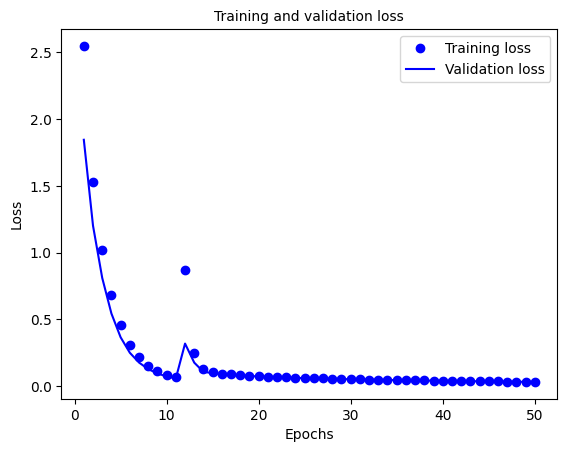

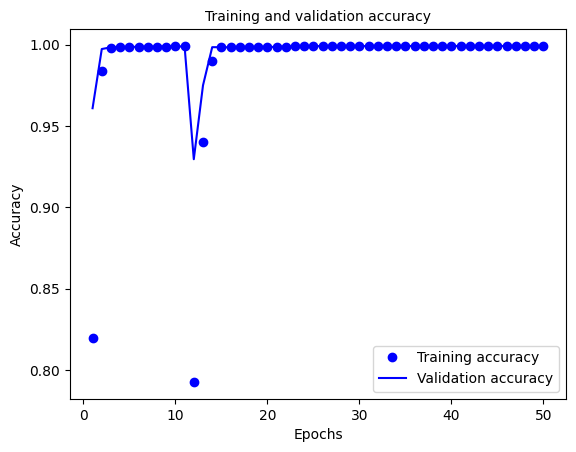

156319/156319 [==============================] - 354s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3246495
           1       1.00      1.00      1.00   1755706

    accuracy                           1.00   5002201
   macro avg       1.00      1.00      1.00   5002201
weighted avg       1.00      1.00      1.00   5002201



In [38]:
# Entrenar el modelo
historia = historia

# Mostrar resultados y graficar
history_dict = historia.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predicción
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

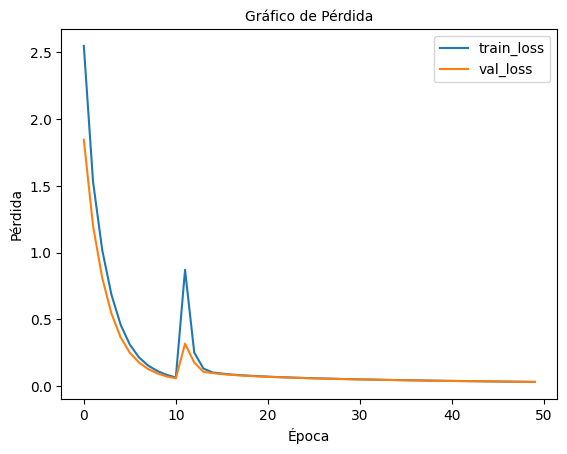

{'loss': [2.5481083393096924, 1.532674789428711, 1.0198278427124023, 0.6861183643341064, 0.46084827184677124, 0.31208911538124084, 0.21561764180660248, 0.1544877588748932, 0.11386237293481827, 0.08555544167757034, 0.06577936559915543, 0.871864378452301, 0.2516044080257416, 0.13282763957977295, 0.10341863334178925, 0.09500502049922943, 0.08824066817760468, 0.0832410529255867, 0.07903552055358887, 0.07544498890638351, 0.07217548042535782, 0.06923681497573853, 0.06665557622909546, 0.0644354373216629, 0.06225952133536339, 0.0601452961564064, 0.05828137695789337, 0.05651881545782089, 0.05485380068421364, 0.0533810518682003, 0.051862142980098724, 0.05045165494084358, 0.049204569309949875, 0.04785757139325142, 0.04664388298988342, 0.04545988142490387, 0.04437093809247017, 0.04330998659133911, 0.04221224784851074, 0.041233327239751816, 0.04017375037074089, 0.039297156035900116, 0.03827200084924698, 0.037484679371118546, 0.03660772740840912, 0.03578396514058113, 0.03487371653318405, 0.034098077

In [39]:

# Mostrar la gráfica del gradiente descendente
plt.plot(historia.history['loss'], label='train_loss')
plt.plot(historia.history['val_loss'], label='val_loss')
plt.title('Gráfico de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Mostrar resultados y graficar
print(historia.history)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predicción
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))
